<a href="https://colab.research.google.com/github/Mohammad-Kaosain-Akbar/Update-25th-May-22/blob/main/LGBM/LGBM%20with%20limited%20inputs/Applying_LGBM_on_Grenoble_Dataset_from_17_to_19_(limited_inputs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import datetime
import time
import math
import warnings
warnings.filterwarnings("ignore")
import glob

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (25,10)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Mohammad-Kaosain-Akbar/NILM-two-years-dataset/main/Data_Greener_all.csv')
df['Time']= pd.to_datetime(df['Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time               43824 non-null  datetime64[ns]
 1   Ventilation        43824 non-null  float64       
 2   Sokets plug        43824 non-null  float64       
 3   Lighting           43824 non-null  float64       
 4   Other electricity  43824 non-null  float64       
 5   Cooling            43824 non-null  float64       
 6   Heating            43824 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.3 MB


In [3]:
Total = df["Ventilation"] + df["Sokets plug"] + df["Lighting"] + df["Other electricity"] + df["Cooling"] + df["Heating"]
# https://www.kite.com/python/answers/how-to-sum-two-columns-in-a-pandas-dataframe-in-python

df["Total"] = Total

In [4]:
df

Time  Ventilation  Sokets plug  Lighting  \
0     2017-01-03 13:00:00         27.4         41.8      53.7   
1     2017-01-03 14:00:00         21.6         37.5      50.9   
2     2017-01-03 15:00:00         18.5         37.4      60.1   
3     2017-01-03 16:00:00         29.7         38.0      52.6   
4     2017-01-03 17:00:00         16.7         38.1      56.7   
...                   ...          ...          ...       ...   
43819 2022-01-03 08:00:00         59.3         17.9      16.6   
43820 2022-01-03 09:00:00         71.9         20.6      33.1   
43821 2022-01-03 10:00:00         90.5         30.9      47.8   
43822 2022-01-03 11:00:00         94.0         33.9      52.2   
43823 2022-01-03 12:00:00         95.3         28.5      36.3   

       Other electricity  Cooling  Heating   Total  
0                   89.6    18.60    498.0  729.10  
1                   64.6    61.90    500.0  736.50  
2                   64.2    16.50    480.0  676.70  
3                   43.2    19.80    390.0  573.30  
4                   42.4    15.20    373.0  542.10  
...                  ...      ...      ...     ...  
43819              115.0    12.70    344.0  565.50  
43820              149.0    11.90    399.0  685.50  
43821              157.0    12.90    397.0  736.10  
43822              155.0    15.40    345.0  695.50  
43823              107.0     7.88    272.0  546.98  

[43824 rows x 8 columns]

In [5]:
df.describe()

Ventilation   Sokets plug      Lighting  Other electricity  \
count  43824.000000  43824.000000  43824.000000       43824.000000   
mean      32.433825     18.414002     14.316892          87.846242   
std       36.211287     27.666459     15.064466          94.951663   
min        0.000000      0.000000      0.000000           0.000000   
25%        7.000000     11.400000      3.690000          35.800000   
50%       14.100000     13.600000      6.500000          79.600000   
75%       56.800000     20.100000     22.500000         103.000000   
max      793.000000    980.000000    132.000000         971.000000   

            Cooling       Heating         Total  
count  43824.000000  43824.000000  43824.000000  
mean      47.084925     68.994602    269.090489  
std       71.422794    113.328362    180.713964  
min        0.000000      0.000000      3.130000  
25%       13.600000      5.500000    151.377500  
50%       21.500000     12.300000    208.180000  
75%       51.600000     89.000000    336.000000  
max     1641.000000   1120.000000   2037.000000

In [6]:
df['Year'] = df['Time'].dt.year
df['Month']=df['Time'].dt.month
df['Quarter_of_year']=df['Time'].dt.quarter
df['Day_of_week']=df['Time'].dt.day_of_week
df['Week_of_year']=df['Time'].dt.week
df['Day']=df['Time'].dt.day
df['Hour']=df['Time'].dt.hour

df.drop('Time', inplace=True, axis=1)

In [7]:
df

Ventilation  Sokets plug  Lighting  Other electricity  Cooling  \
0             27.4         41.8      53.7               89.6    18.60   
1             21.6         37.5      50.9               64.6    61.90   
2             18.5         37.4      60.1               64.2    16.50   
3             29.7         38.0      52.6               43.2    19.80   
4             16.7         38.1      56.7               42.4    15.20   
...            ...          ...       ...                ...      ...   
43819         59.3         17.9      16.6              115.0    12.70   
43820         71.9         20.6      33.1              149.0    11.90   
43821         90.5         30.9      47.8              157.0    12.90   
43822         94.0         33.9      52.2              155.0    15.40   
43823         95.3         28.5      36.3              107.0     7.88   

       Heating   Total  Year  Month  Quarter_of_year  Day_of_week  \
0        498.0  729.10  2017      1                1            1   
1        500.0  736.50  2017      1                1            1   
2        480.0  676.70  2017      1                1            1   
3        390.0  573.30  2017      1                1            1   
4        373.0  542.10  2017      1                1            1   
...        ...     ...   ...    ...              ...          ...   
43819    344.0  565.50  2022      1                1            0   
43820    399.0  685.50  2022      1                1            0   
43821    397.0  736.10  2022      1                1            0   
43822    345.0  695.50  2022      1                1            0   
43823    272.0  546.98  2022      1                1            0   

       Week_of_year  Day  Hour  
0                 1    3    13  
1                 1    3    14  
2                 1    3    15  
3                 1    3    16  
4                 1    3    17  
...             ...  ...   ...  
43819             1    3     8  
43820             1    3     9  
43821             1    3    10  
43822             1    3    11  
43823             1    3    12  

[43824 rows x 14 columns]

In [8]:
df1_train = df.loc[(df['Year'].isin([2017,2018]))]

##################################################################

df1_test = df.loc[(df['Year'].isin([2019]))]  # general model

df2_test = df.loc[(df['Year'].isin([2019]))&(df['Month'].isin([6,7,8,9]))]  # summer

df3_test = df.loc[(df['Year'].isin([2019]))&(df['Month'].isin([12,1,2,3]))]  # winter

df4_test = df.loc[(df['Year'].isin([2019]))&(df['Hour'].isin([1,2,3,4,5,6,7,8]))&(df['Day_of_week'].isin([0,1,2,3,4]))]  # early morning 1am to 8 am

df5_test = df.loc[(df['Year'].isin([2019]))&(df['Hour'].isin([9,10,11,12,13,14,15,16,17,18,19]))&(df['Day_of_week'].isin([0,1,2,3,4]))]  # working hours 9am to 7pm

df6_test = df.loc[(df['Year'].isin([2019]))&(df['Hour'].isin([20,21,22,23,0]))&(df['Day_of_week'].isin([0,1,2,3,4]))]  #night hours 8 pm to 12 am

df7_test = df.loc[(df['Year'].isin([2019]))&(df['Day_of_week'].isin([5,6]))]  # weekend


print('df_train.shape: ', df1_train.shape)
print('df_test.shape: ', df1_test.shape)


df_train.shape:  (17459, 14)
df_test.shape:  (8760, 14)


In [9]:
df1_train

Ventilation  Sokets plug  Lighting  Other electricity  Cooling  \
0             27.4         41.8     53.70              89.60    18.60   
1             21.6         37.5     50.90              64.60    61.90   
2             18.5         37.4     60.10              64.20    16.50   
3             29.7         38.0     52.60              43.20    19.80   
4             16.7         38.1     56.70              42.40    15.20   
...            ...          ...       ...                ...      ...   
17454          0.0         11.7      7.50              11.60     8.69   
17455          0.0         10.9      9.38              10.50     8.75   
17456          0.0         12.0      8.06               7.50    10.40   
17457          0.0         10.3      6.75               9.63    10.90   
17458          0.0         10.9      3.19              11.30     9.63   

       Heating   Total  Year  Month  Quarter_of_year  Day_of_week  \
0        498.0  729.10  2017      1                1            1   
1        500.0  736.50  2017      1                1            1   
2        480.0  676.70  2017      1                1            1   
3        390.0  573.30  2017      1                1            1   
4        373.0  542.10  2017      1                1            1   
...        ...     ...   ...    ...              ...          ...   
17454    250.0  289.49  2018     12                4            0   
17455    234.0  273.53  2018     12                4            0   
17456    233.0  270.96  2018     12                4            0   
17457    234.0  271.58  2018     12                4            0   
17458    217.0  252.02  2018     12                4            0   

       Week_of_year  Day  Hour  
0                 1    3    13  
1                 1    3    14  
2                 1    3    15  
3                 1    3    16  
4                 1    3    17  
...             ...  ...   ...  
17454             1   31    19  
17455             1   31    20  
17456             1   31    21  
17457             1   31    22  
17458             1   31    23  

[17459 rows x 14 columns]

In [10]:
X_train1 = df1_train[['Total', 'Year', 'Month', 'Day', 'Hour']].values
y_train1 = df1_train[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
X_test1 = df1_test[['Total', 'Year', 'Month', 'Day', 'Hour']].values
y_test1 = df1_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape)

(17459, 5) (17459, 6) (8760, 5) (8760, 6)


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1=sc.fit_transform(X_test1)

In [12]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import SGDRegressor

model = MultiOutputRegressor(SGDRegressor())
model.fit(X_train1, y_train1)

MultiOutputRegressor(estimator=SGDRegressor())

In [13]:
pred = model.predict(X_test1)


**GENERAL**

In [14]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

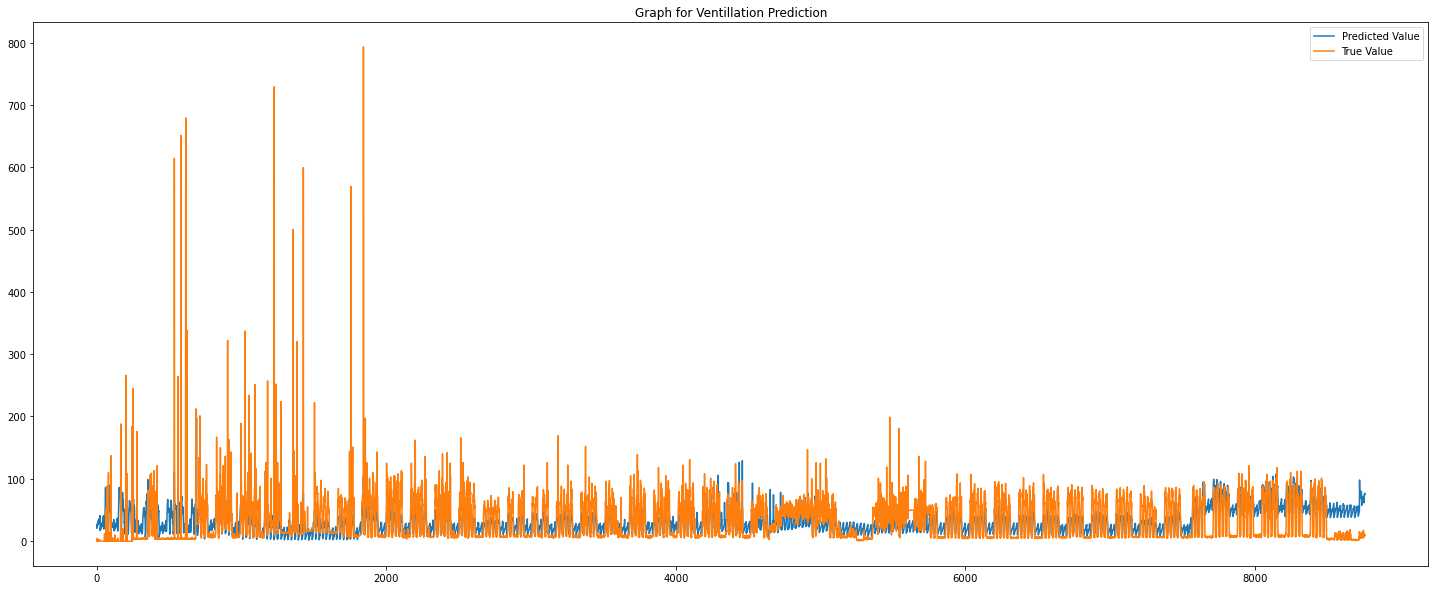

In [15]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [16]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  21.427385364494103

Root Mean Sqaured Error is:  33.82328327864946

R2 score is:  0.1616454095010902


In [17]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

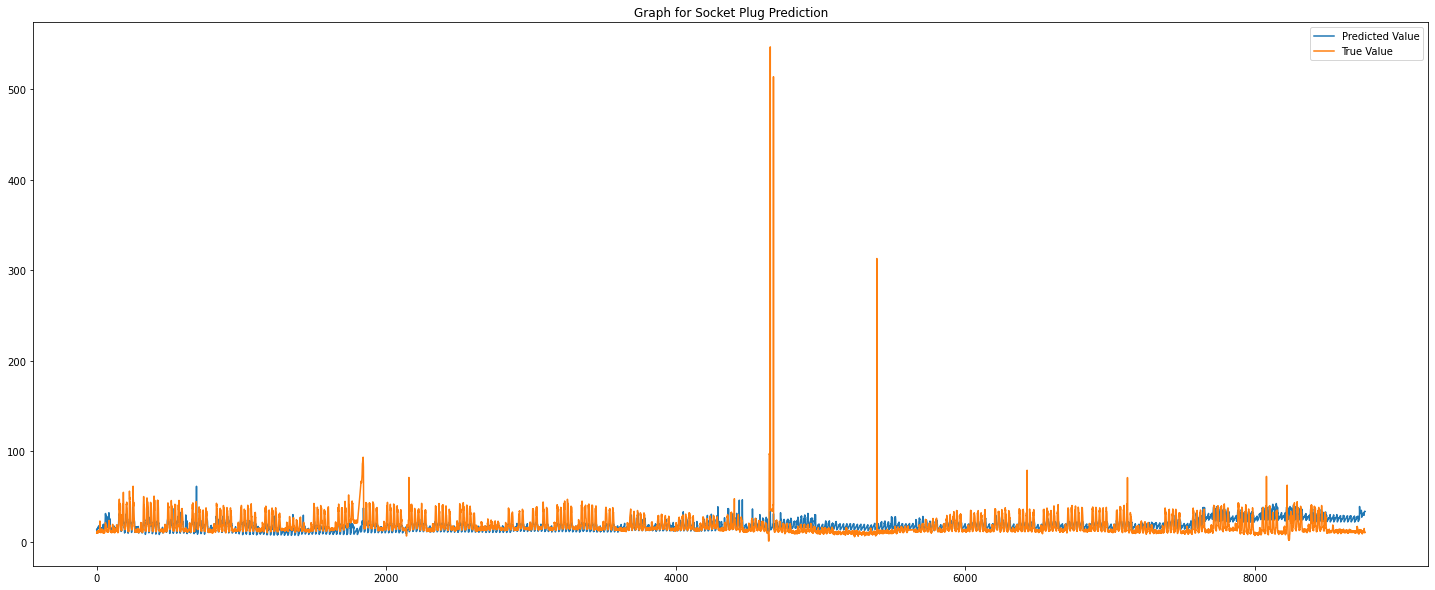

In [18]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [19]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  6.638601182615078

Root Mean Sqaured Error is:  12.730723454250509

R2 score is:  0.030154832349818972


In [20]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

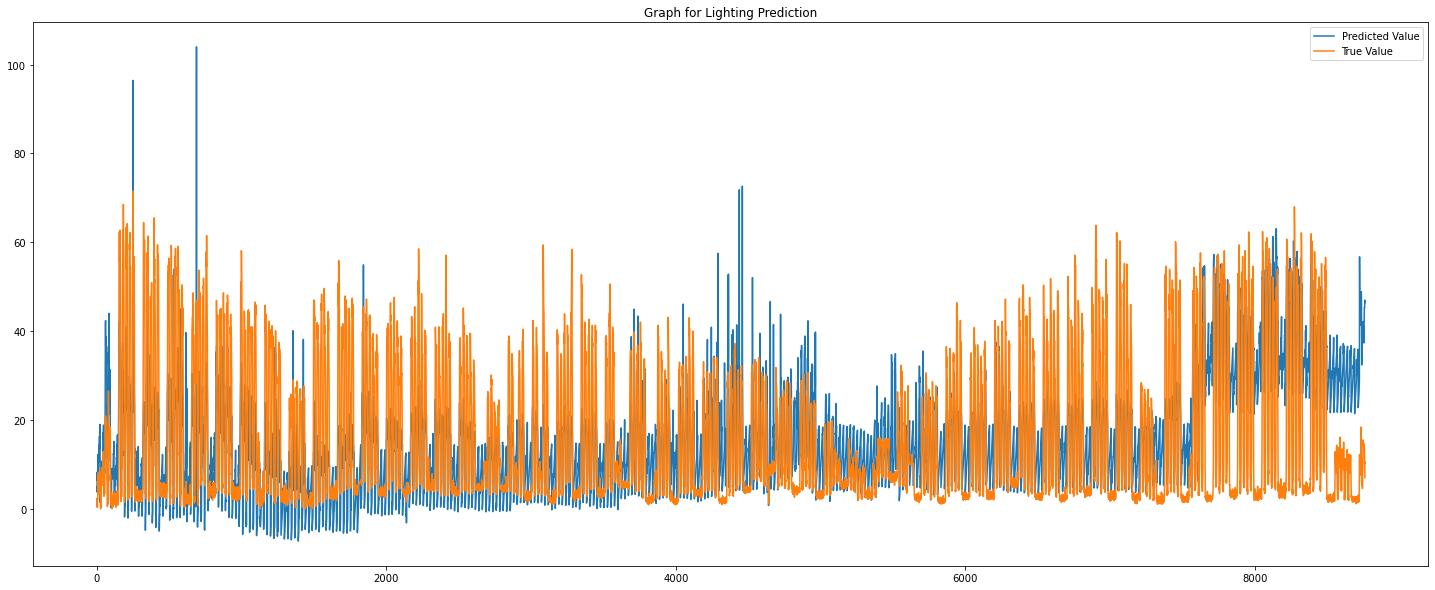

In [21]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [22]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  10.113072858909787

Root Mean Sqaured Error is:  13.761694558380299

R2 score is:  0.24440352755203554


In [23]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

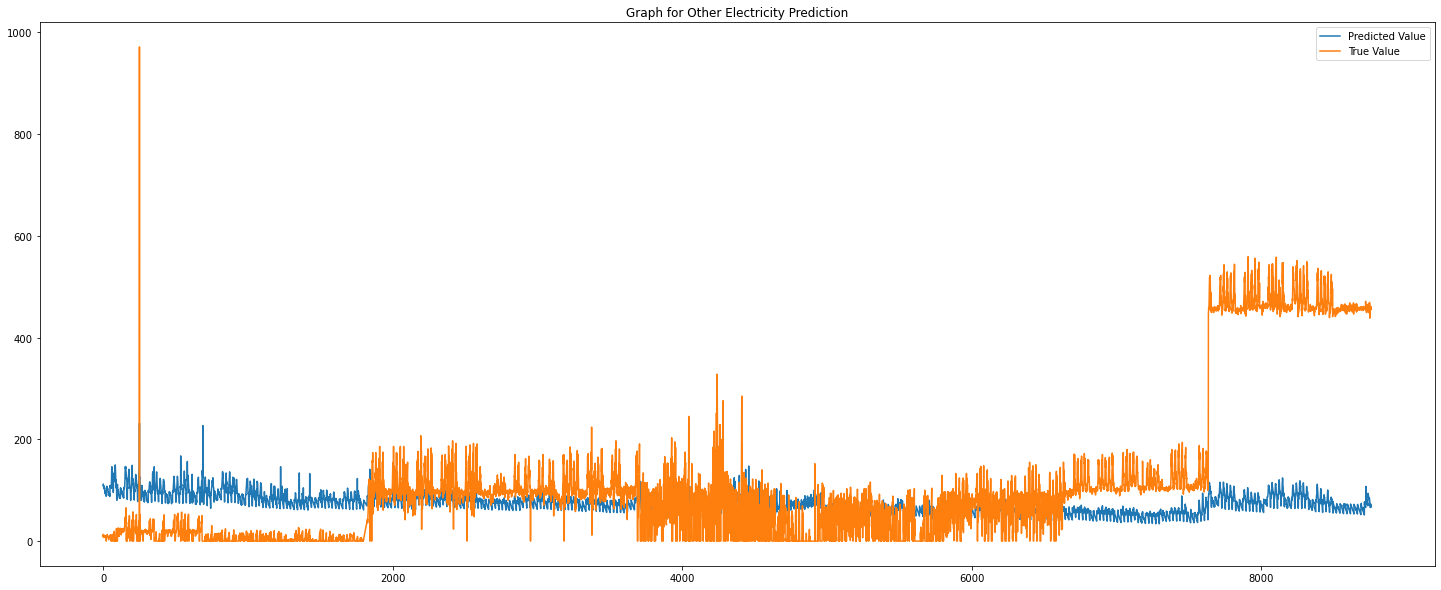

In [24]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [25]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  94.516108328237

Root Mean Sqaured Error is:  150.83120057540285

R2 score is:  -0.09216098342663503


In [26]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

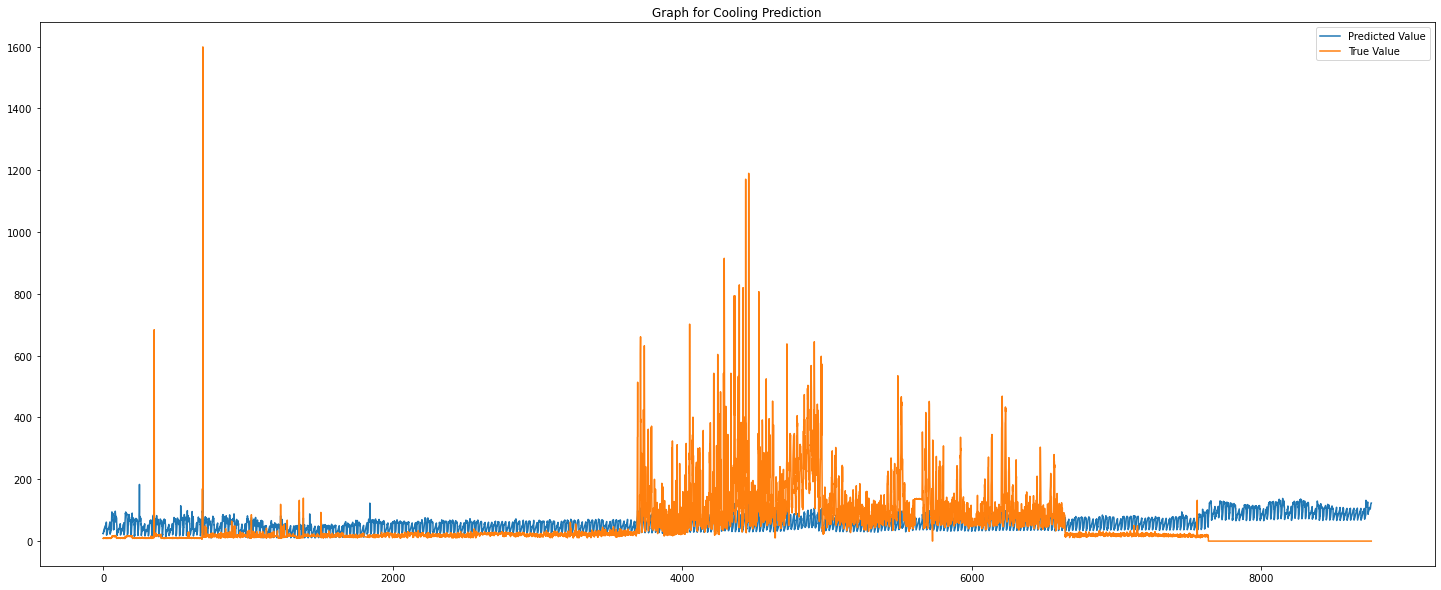

In [27]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [28]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  55.46179412224915

Root Mean Sqaured Error is:  85.33283159213082

R2 score is:  0.0062048810875814375


In [29]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

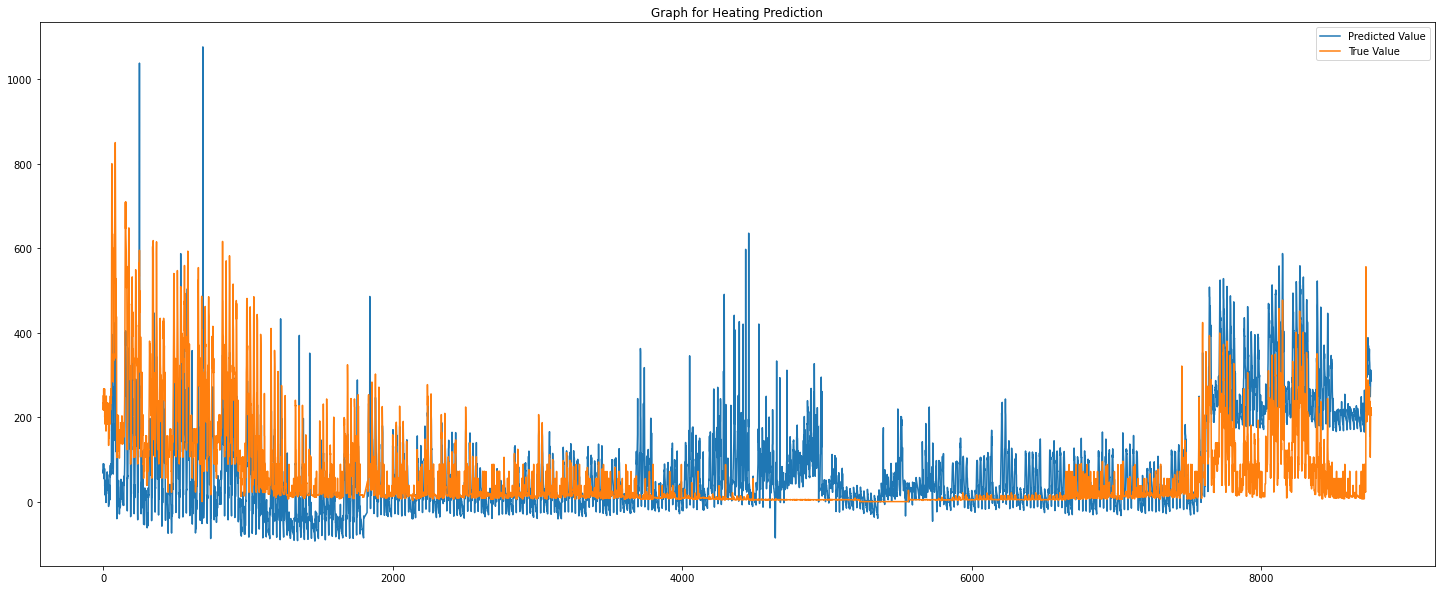

In [30]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [31]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  74.58472396826576

Root Mean Sqaured Error is:  103.19184448292924

R2 score is:  0.053388123610618954


**SUMMER**

In [32]:
X_test1 = df2_test[['Total', 'Year', 'Month', 'Day', 'Hour']].values
y_test1 = df2_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2928, 5) (2928, 6)


In [33]:
X_test1=sc.fit_transform(X_test1)

In [34]:
pred = model.predict(X_test1)

In [35]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

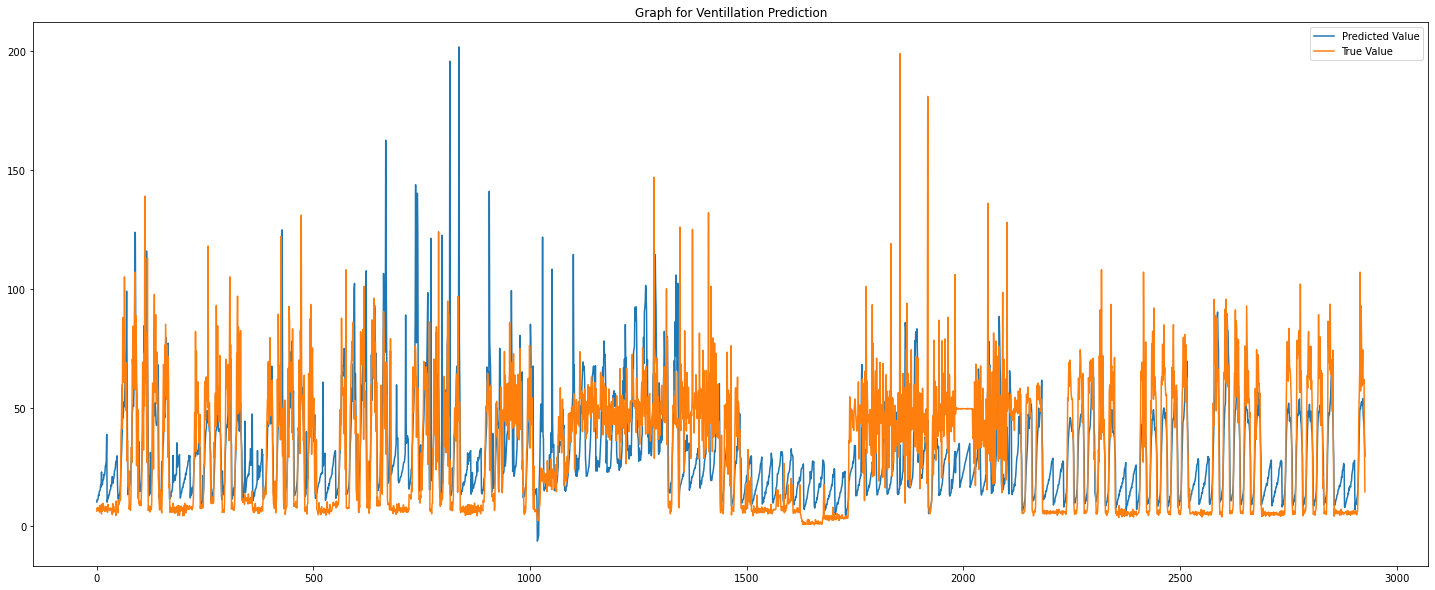

In [36]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [37]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  15.767497548236076

Root Mean Sqaured Error is:  21.30034873168468

R2 score is:  0.33068094647591884


In [38]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

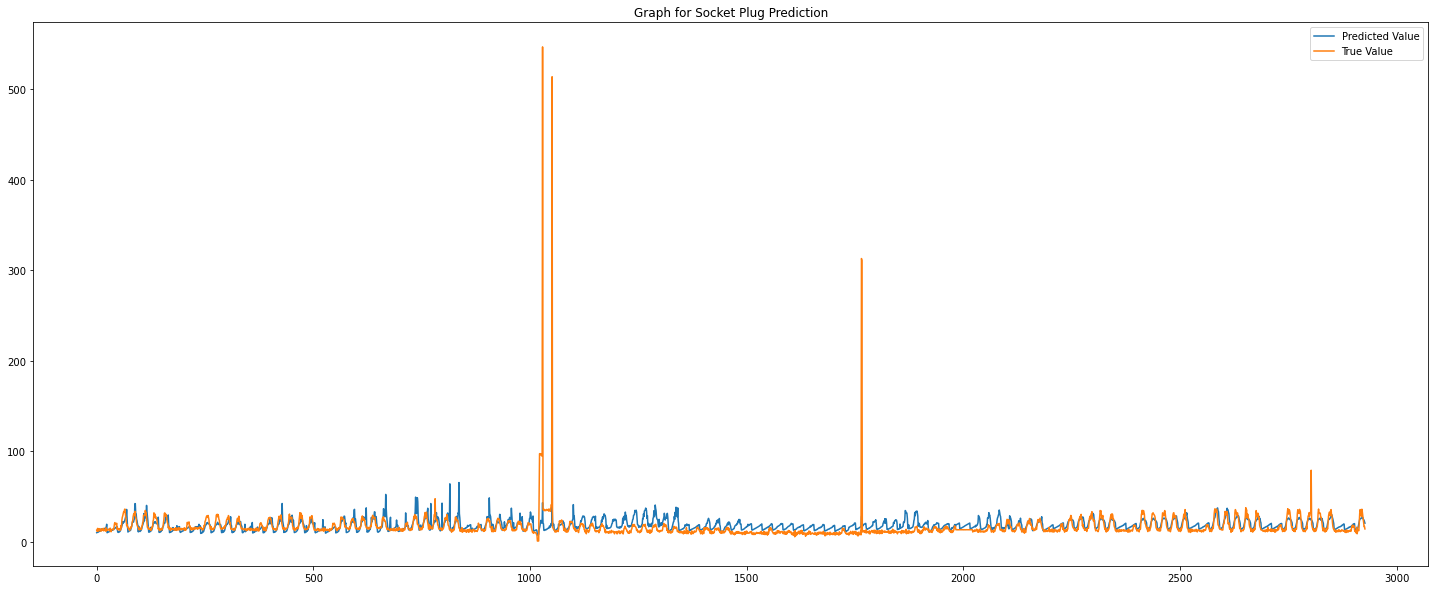

In [39]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [40]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  5.604094705263108

Root Mean Sqaured Error is:  16.602851909299147

R2 score is:  0.07292640663670458


In [41]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

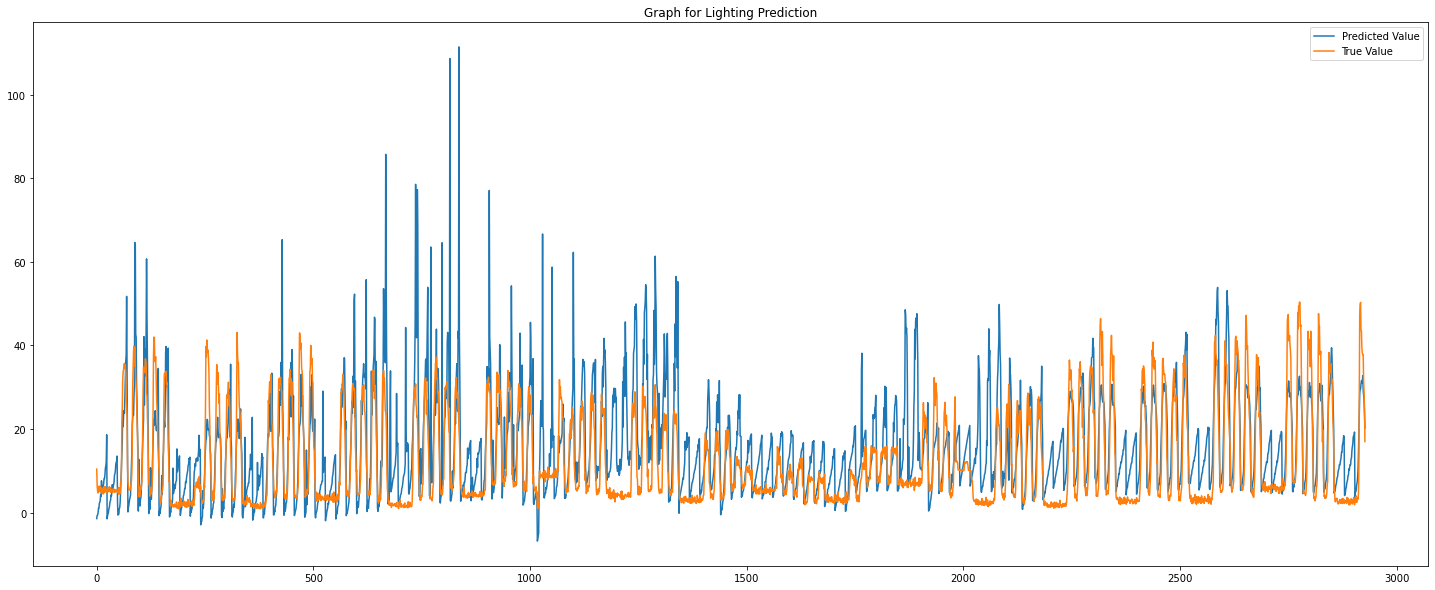

In [42]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [43]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  7.055875106413742

Root Mean Sqaured Error is:  10.134619070558166

R2 score is:  0.16656899070367903


In [44]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

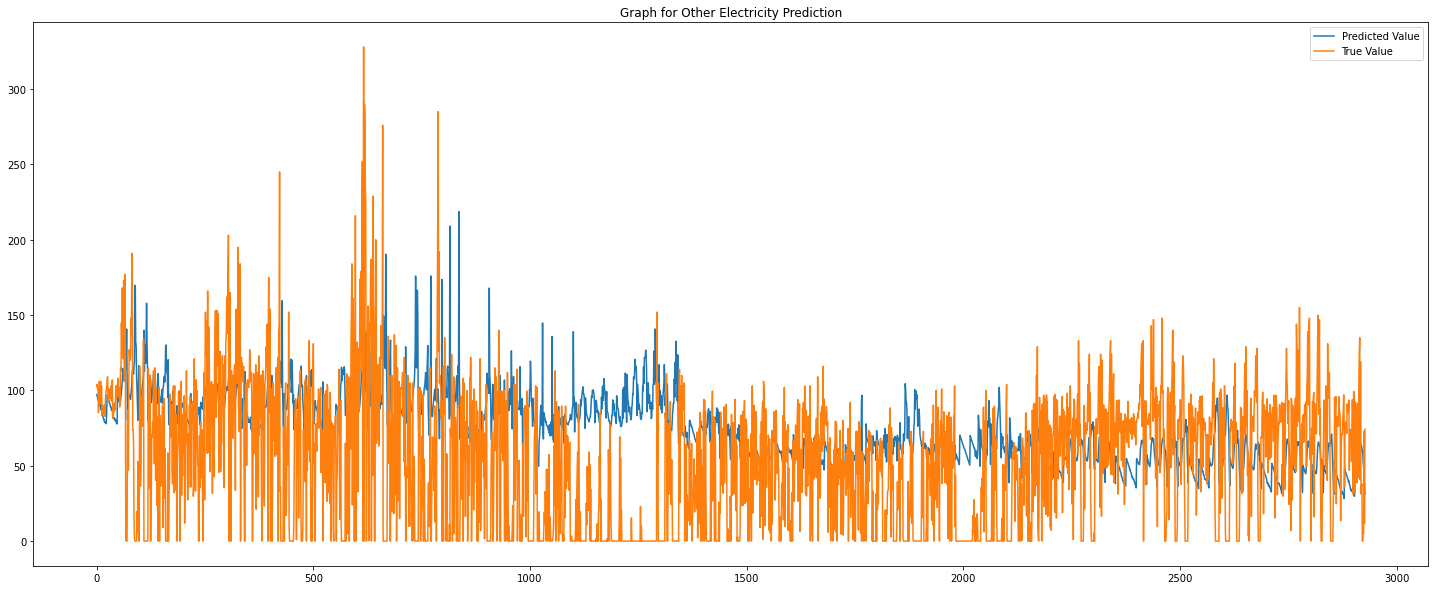

In [45]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [46]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  44.37315674561484

Root Mean Sqaured Error is:  55.85501063231779

R2 score is:  -0.555573360127001


In [47]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

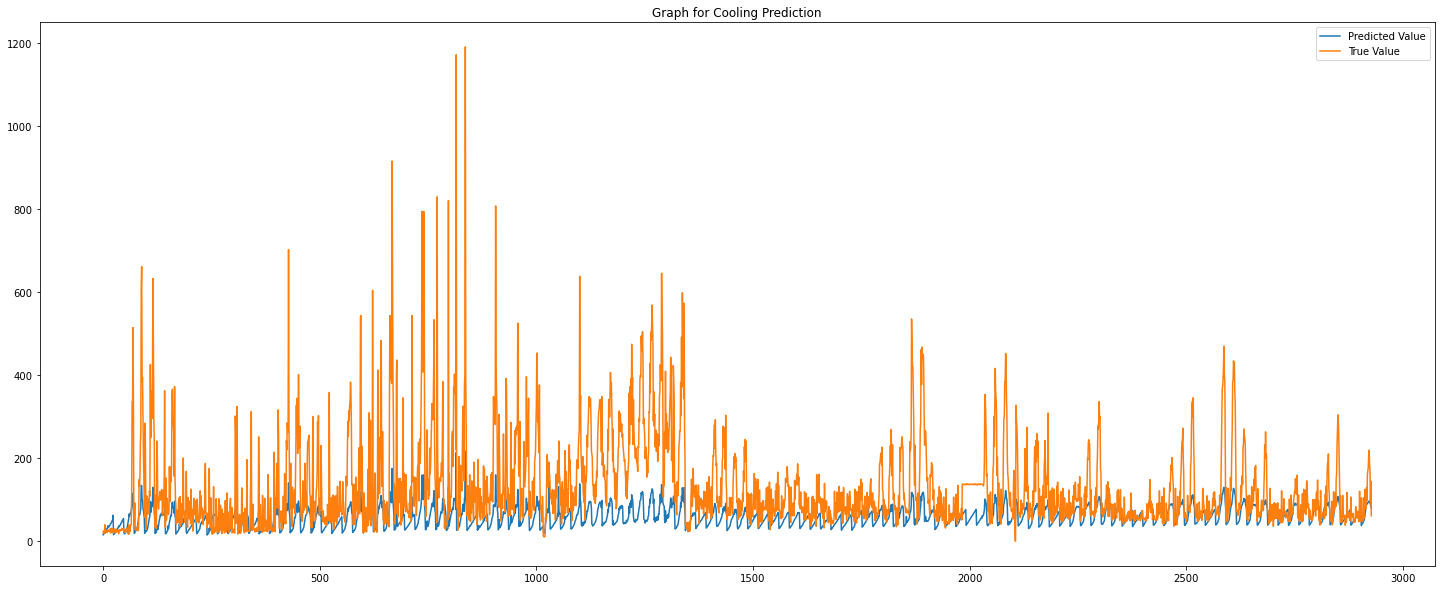

In [48]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [49]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  74.64955775727353

Root Mean Sqaured Error is:  117.65368267903347

R2 score is:  -0.14761602366705628


In [50]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

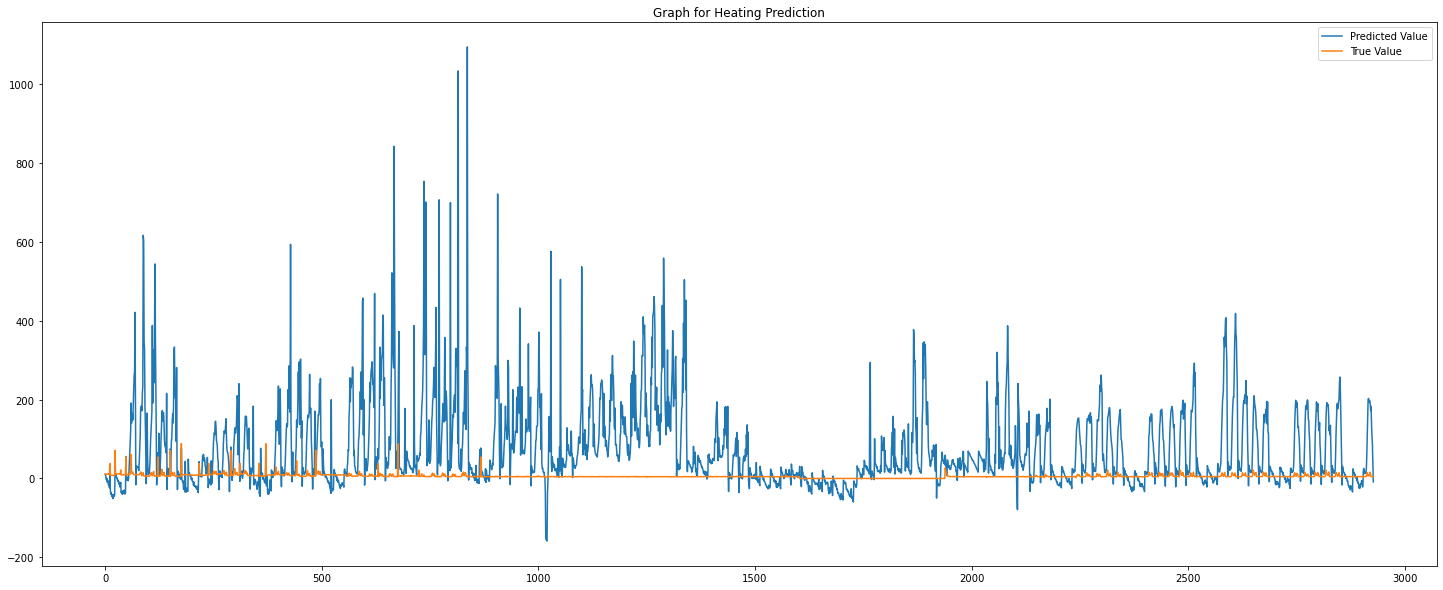

In [51]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [52]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  78.98490799891167

Root Mean Sqaured Error is:  126.31085146230981

R2 score is:  -508.5617968278796


**WINTER**

In [53]:
X_test1 = df3_test[['Total', 'Year', 'Month', 'Day', 'Hour']].values
y_test1 = df3_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2903, 5) (2903, 6)


In [54]:
X_test1=sc.fit_transform(X_test1)

In [55]:
pred = model.predict(X_test1)

In [56]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

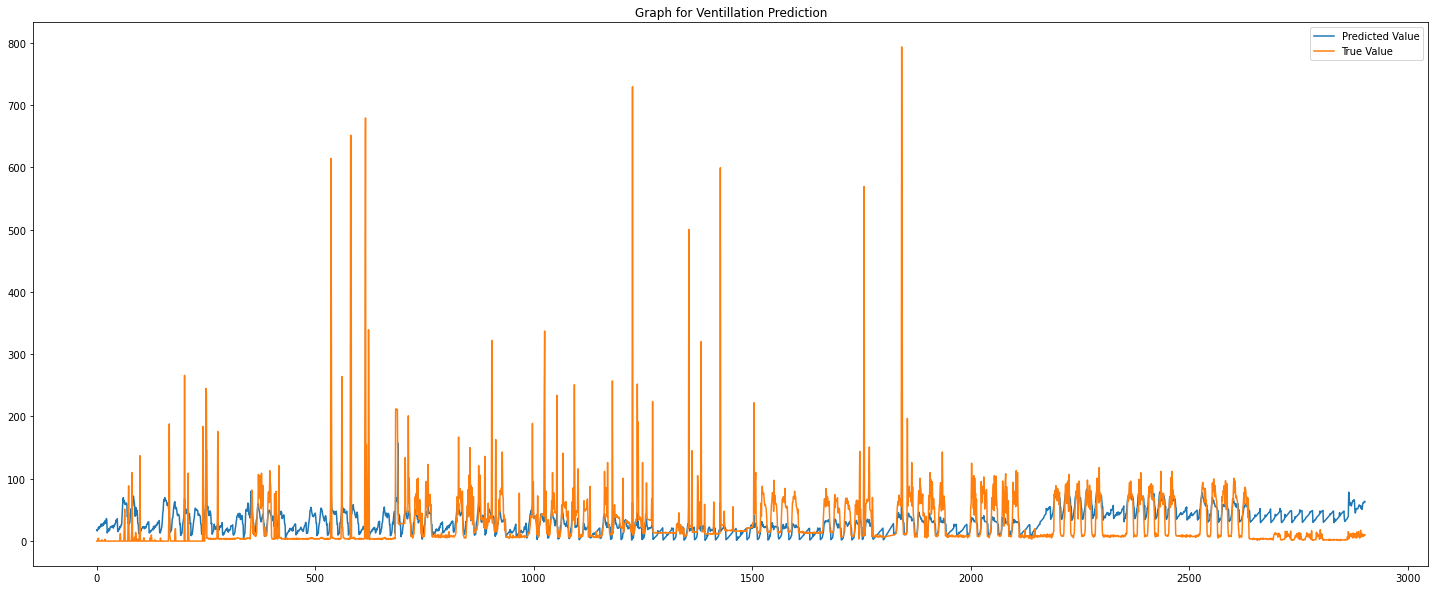

In [57]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [58]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  25.68145989858517

Root Mean Sqaured Error is:  47.61468270573737

R2 score is:  0.11156151728822905


In [59]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

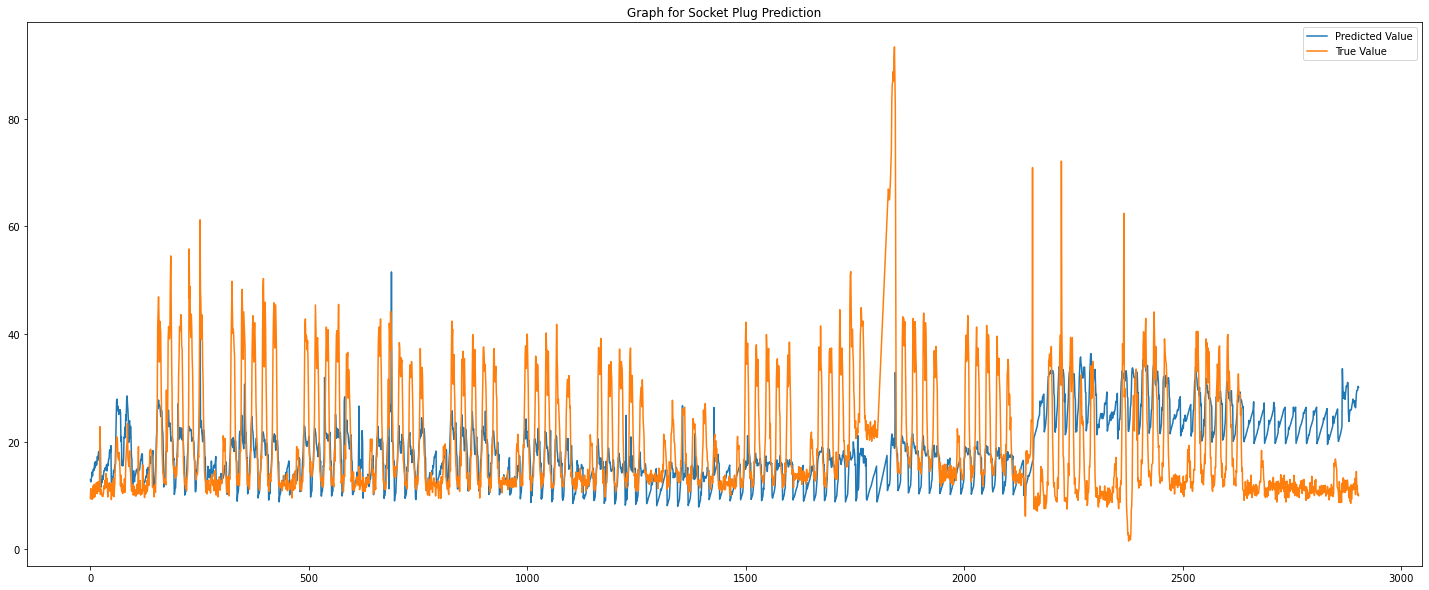

In [60]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [61]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  8.035766572697664

Root Mean Sqaured Error is:  11.378062514015582

R2 score is:  -0.06704060718844085


In [62]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

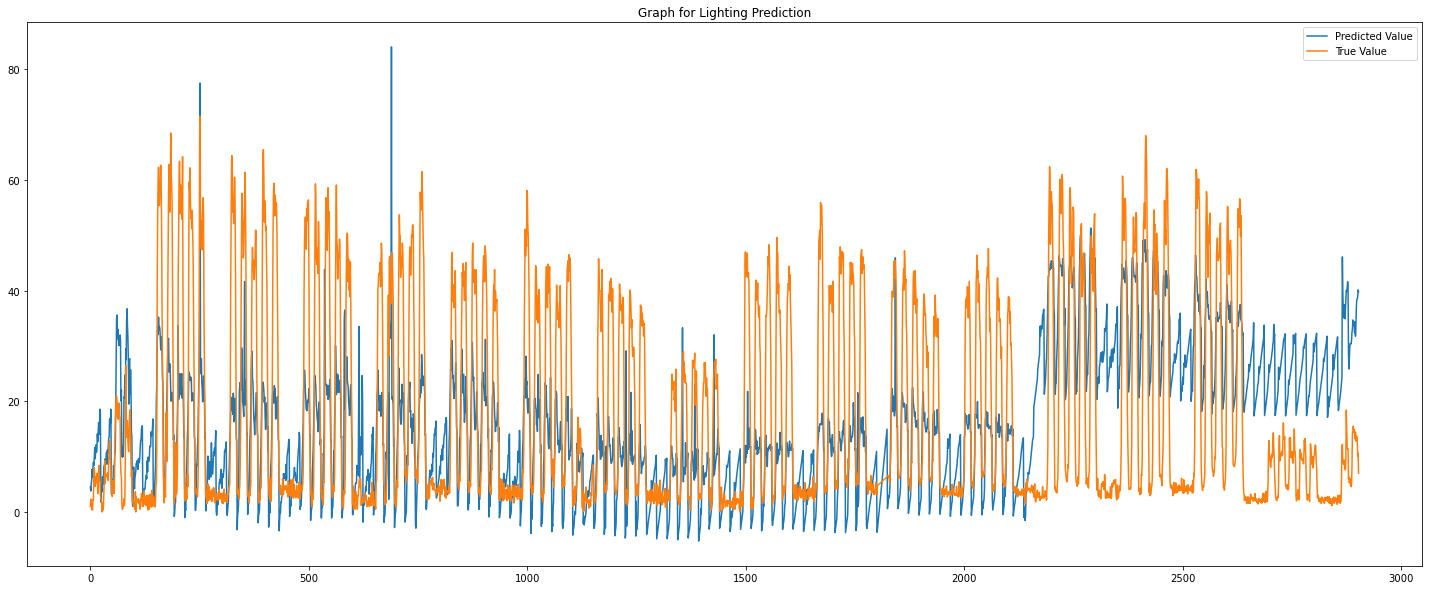

In [63]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [64]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  12.98731716205885

Root Mean Sqaured Error is:  16.522569671015724

R2 score is:  0.18684881331389003


In [65]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

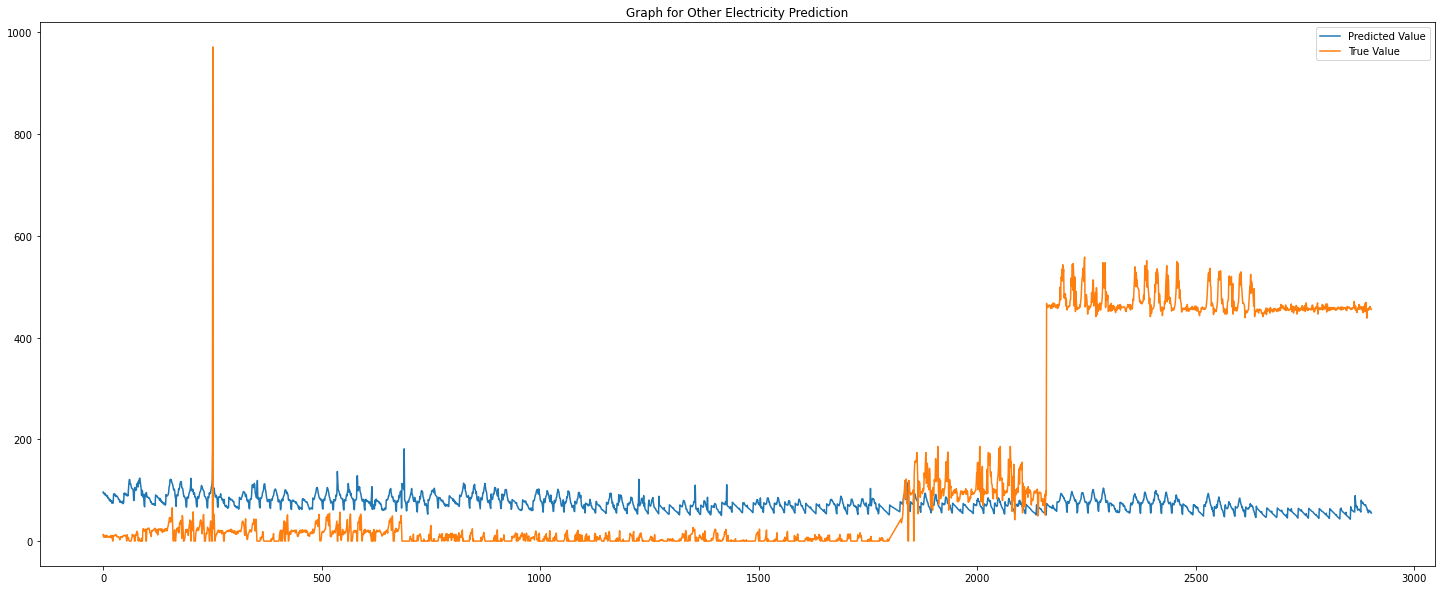

In [66]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [67]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  150.7914692967824

Root Mean Sqaured Error is:  212.02532190680714

R2 score is:  -0.15025281217375475


In [68]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

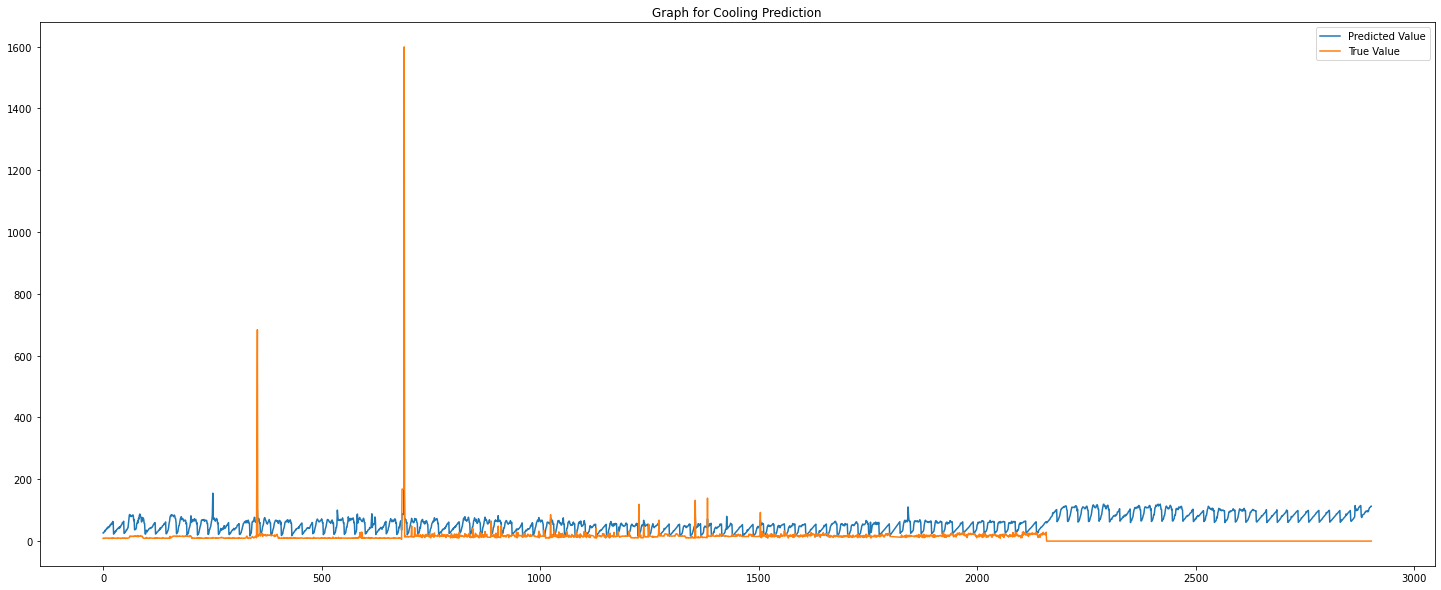

In [69]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [70]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  47.56368187014954

Root Mean Sqaured Error is:  62.62205038793883

R2 score is:  -2.3024176024110177


In [71]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

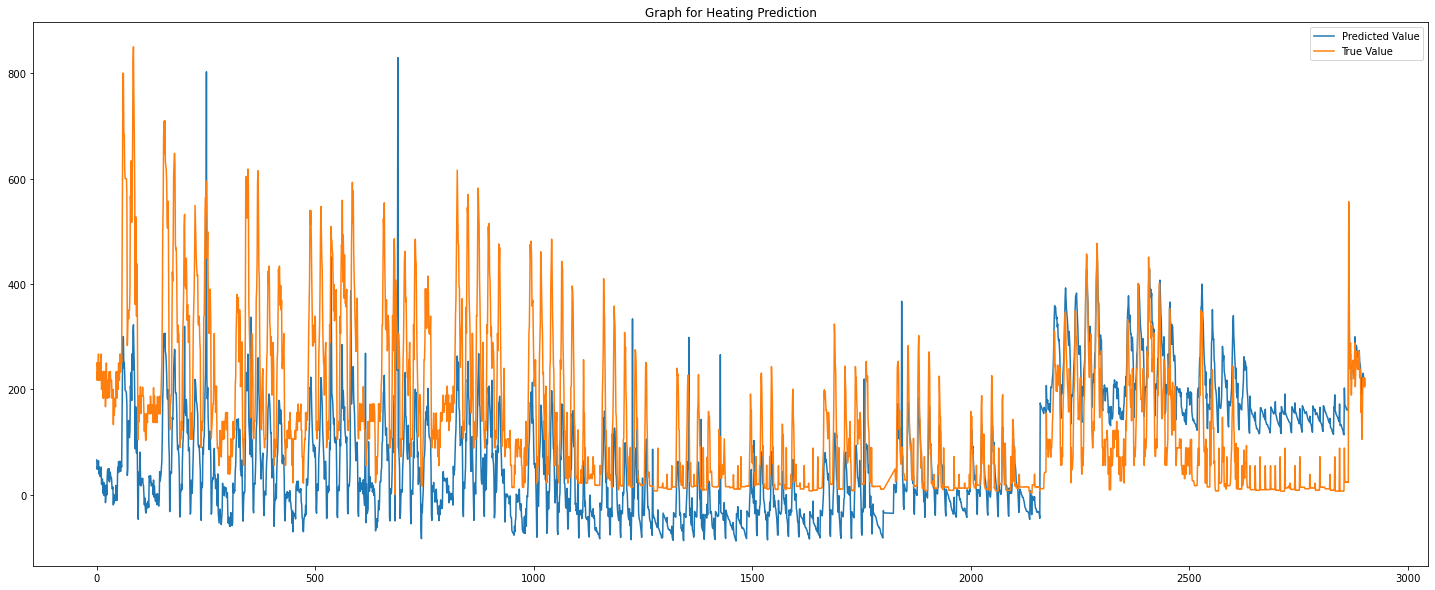

In [72]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [73]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  119.68186976411076

Root Mean Sqaured Error is:  142.78607833744837

R2 score is:  0.020957129483762826


**Early Morning (1am to 8am)**

In [74]:
X_test1 = df4_test[['Total', 'Year', 'Month', 'Day', 'Hour']].values
y_test1 = df4_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2088, 5) (2088, 6)


In [75]:
X_test1=sc.fit_transform(X_test1)

In [76]:
pred = model.predict(X_test1)

In [77]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

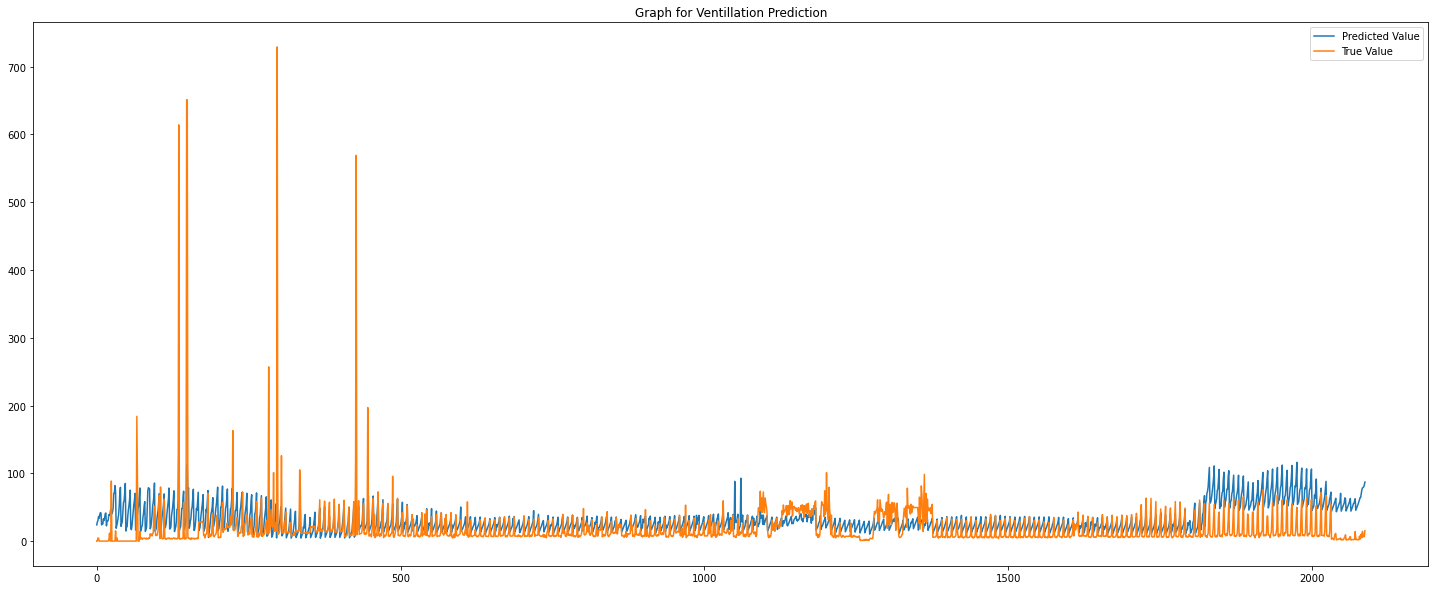

In [78]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [79]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  21.483690169694217

Root Mean Sqaured Error is:  37.992107375581824

R2 score is:  -0.11758376510816082


In [80]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

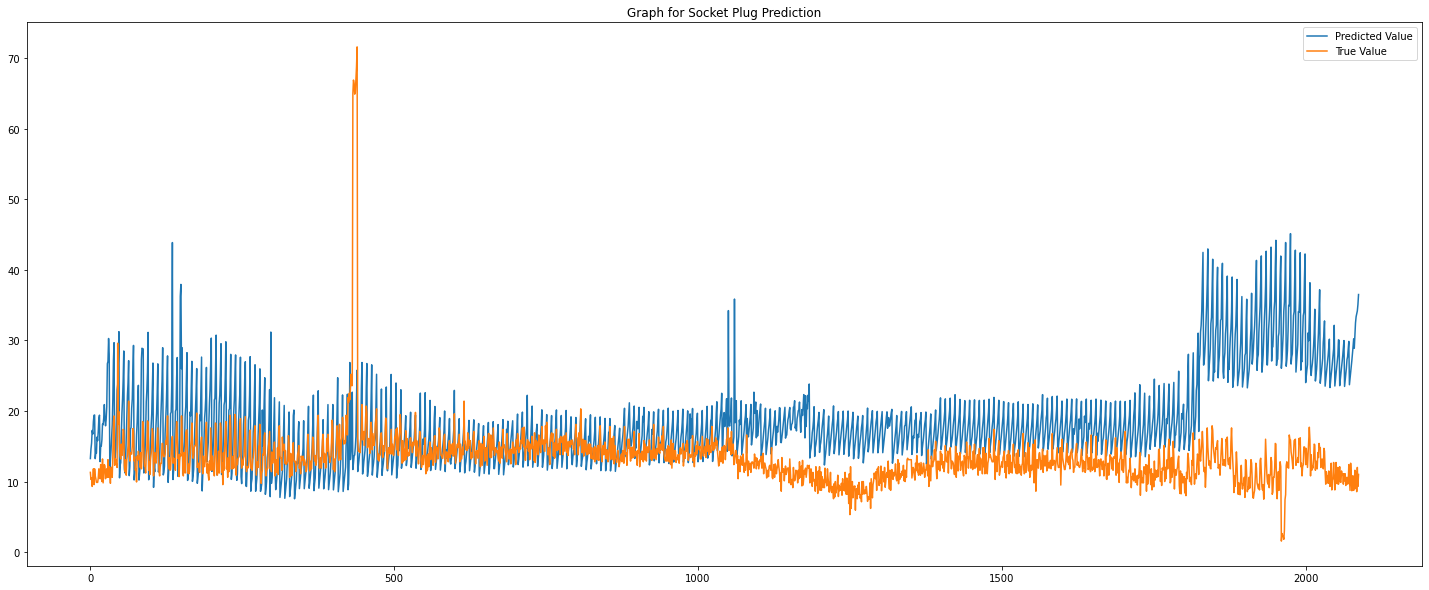

In [81]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [82]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  6.25573816874062

Root Mean Sqaured Error is:  9.006847338151518

R2 score is:  -3.6674857377876355


In [83]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

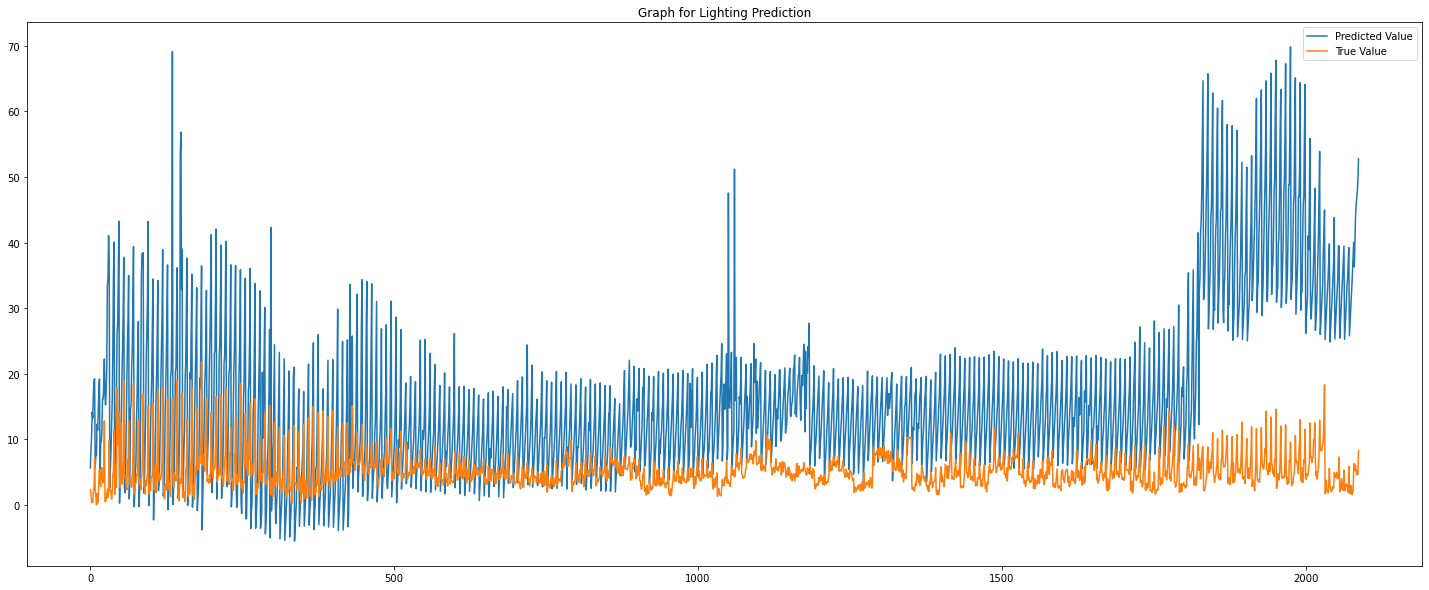

In [84]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [85]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  11.545445868162746

Root Mean Sqaured Error is:  15.824975425098508

R2 score is:  -35.94303283826925


In [86]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

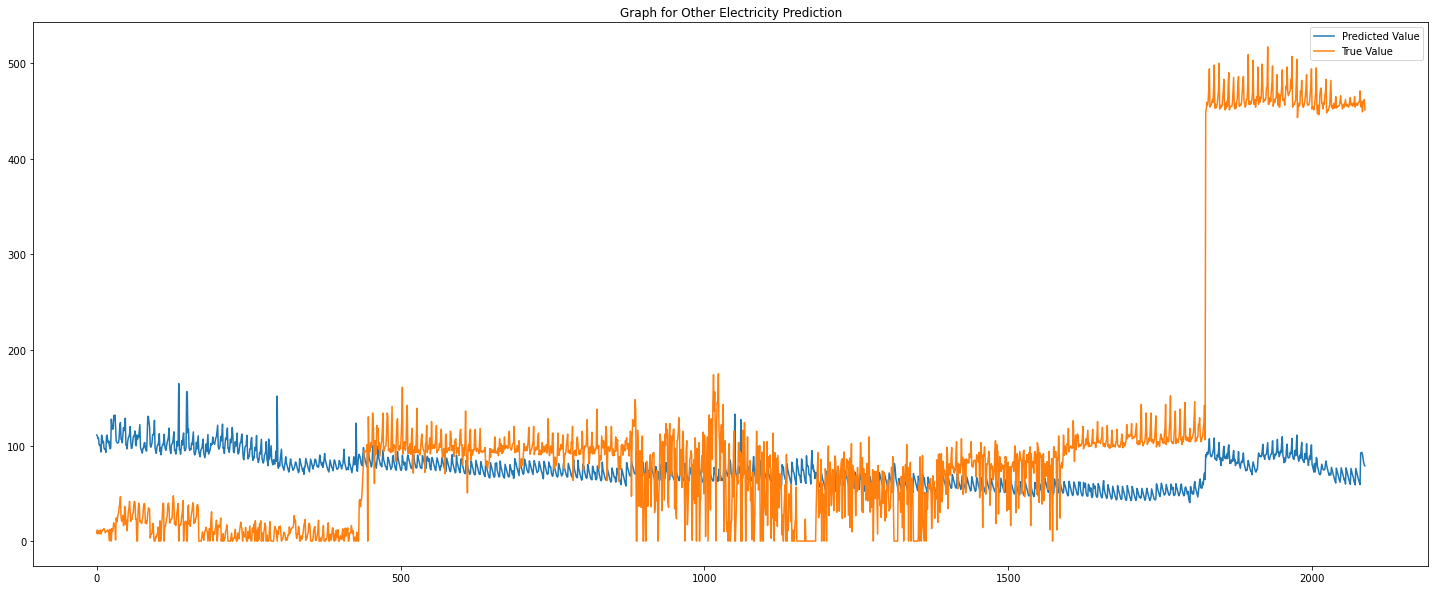

In [87]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [88]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  87.05204460184403

Root Mean Sqaured Error is:  143.99279130518534

R2 score is:  -0.08965752588805298


In [89]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

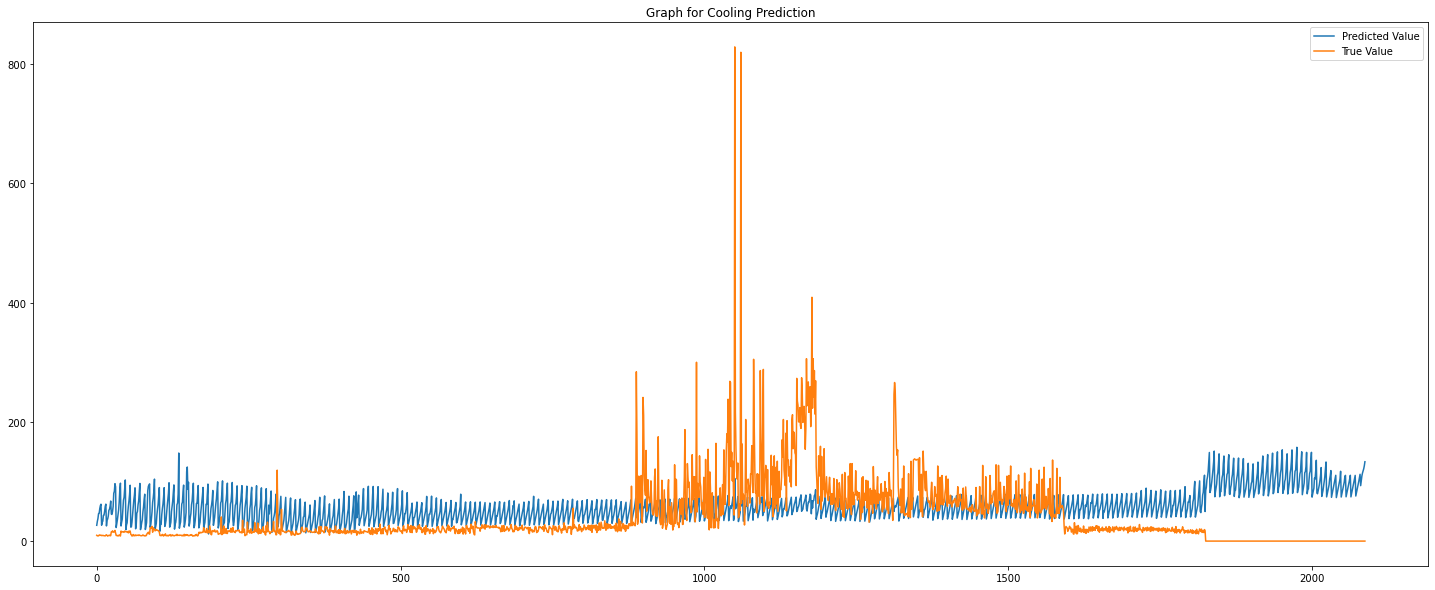

In [90]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [91]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  44.66406413191749

Root Mean Sqaured Error is:  63.52337373005888

R2 score is:  -0.391704677848574


In [92]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

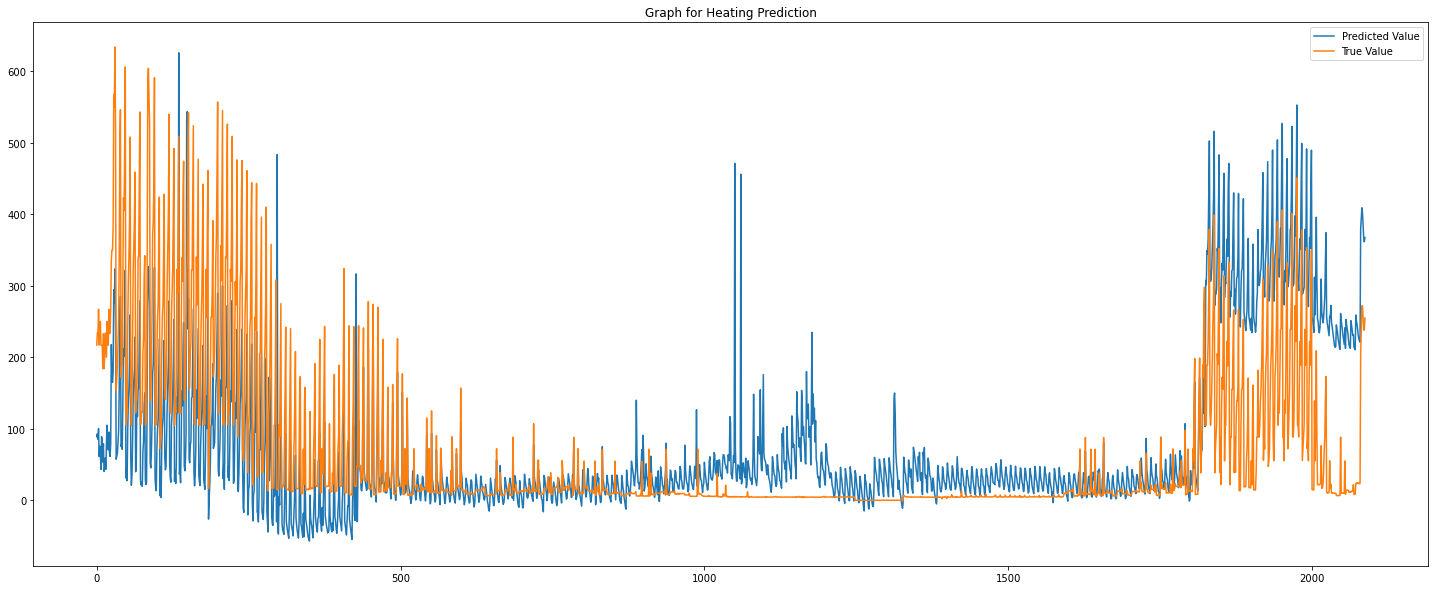

In [93]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [94]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  65.58503561802226

Root Mean Sqaured Error is:  98.8753284544581

R2 score is:  0.2078294515123611


**Working Hours (9am to 7pm)**

In [95]:
X_test1 = df5_test[['Total', 'Year', 'Month', 'Day', 'Hour']].values
y_test1 = df5_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2871, 5) (2871, 6)


In [96]:
X_test1=sc.fit_transform(X_test1)

In [97]:
pred = model.predict(X_test1)

In [98]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

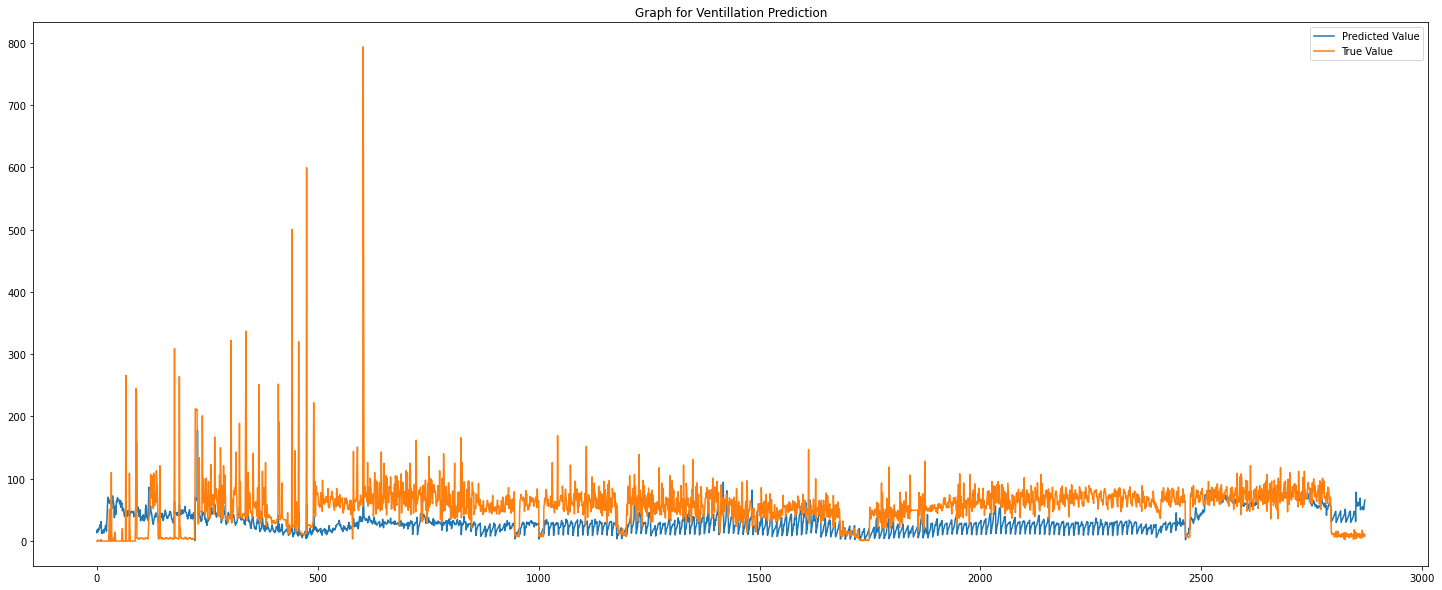

In [99]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [100]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  34.073917712393445

Root Mean Sqaured Error is:  45.203834845114216

R2 score is:  -0.47499008133406817


In [101]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

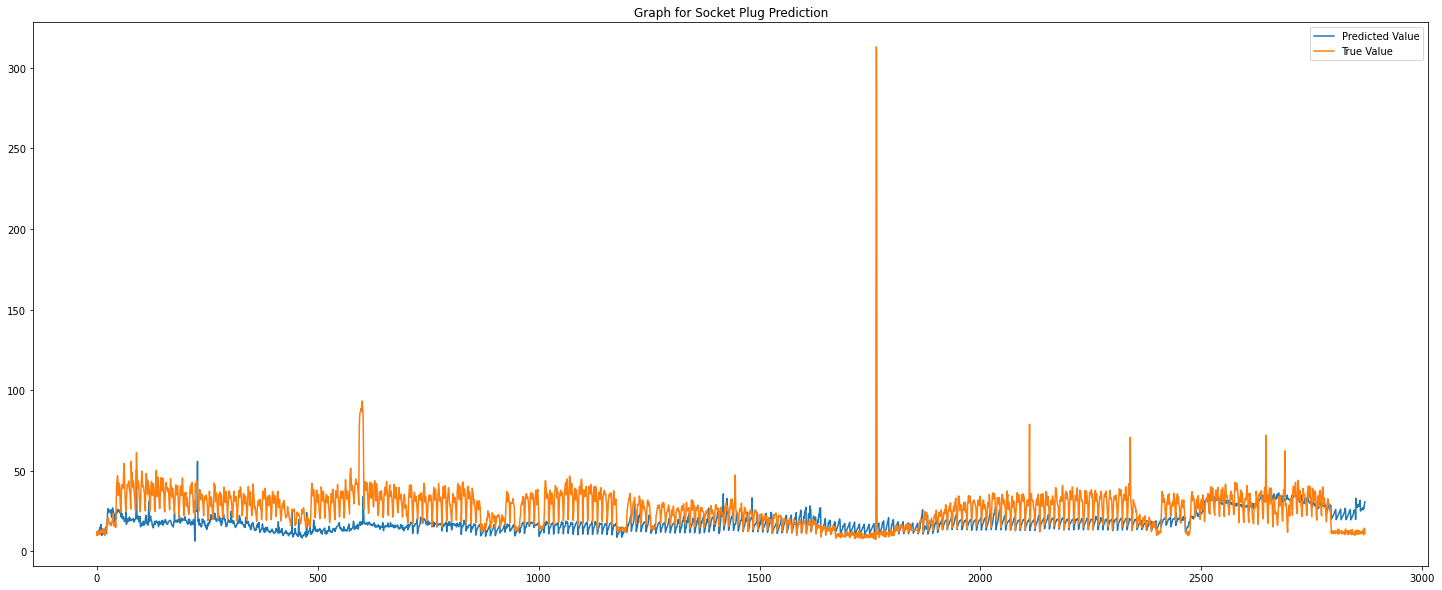

In [102]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [103]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  10.645379481764074

Root Mean Sqaured Error is:  15.278667628618267

R2 score is:  -0.4731099910255516


In [104]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

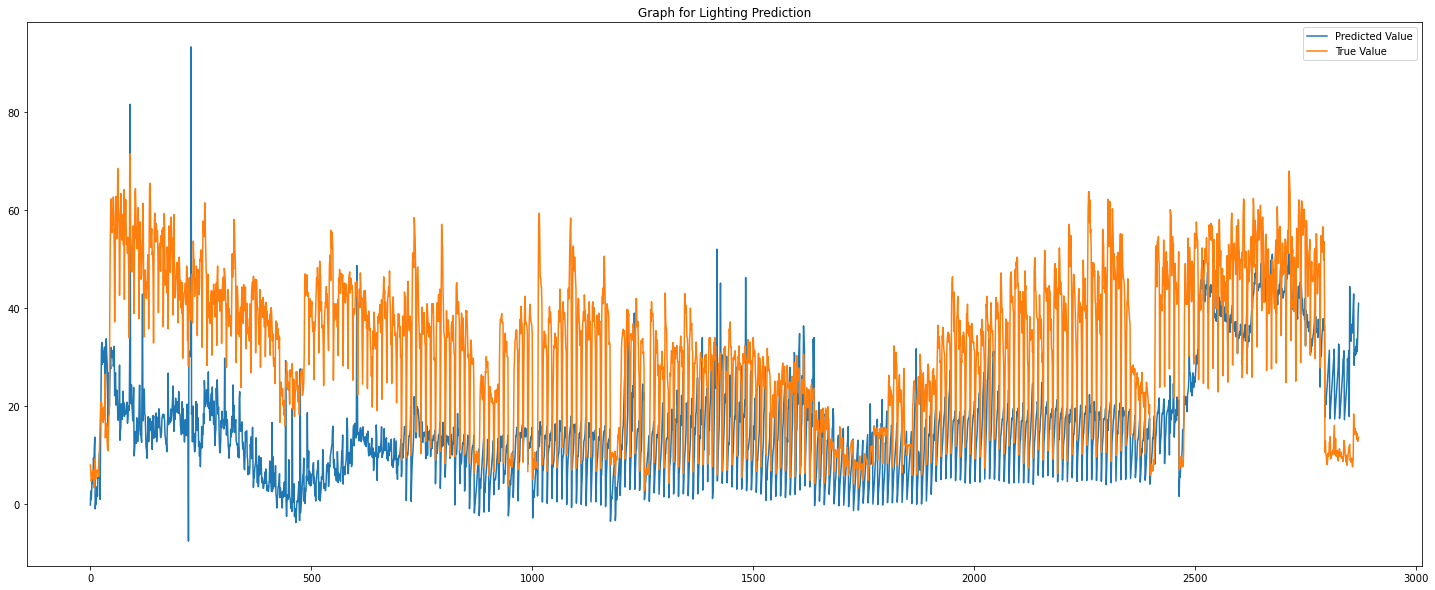

In [105]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [106]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  18.303406283334546

Root Mean Sqaured Error is:  21.40821064800182

R2 score is:  -1.1323009861826239


In [107]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

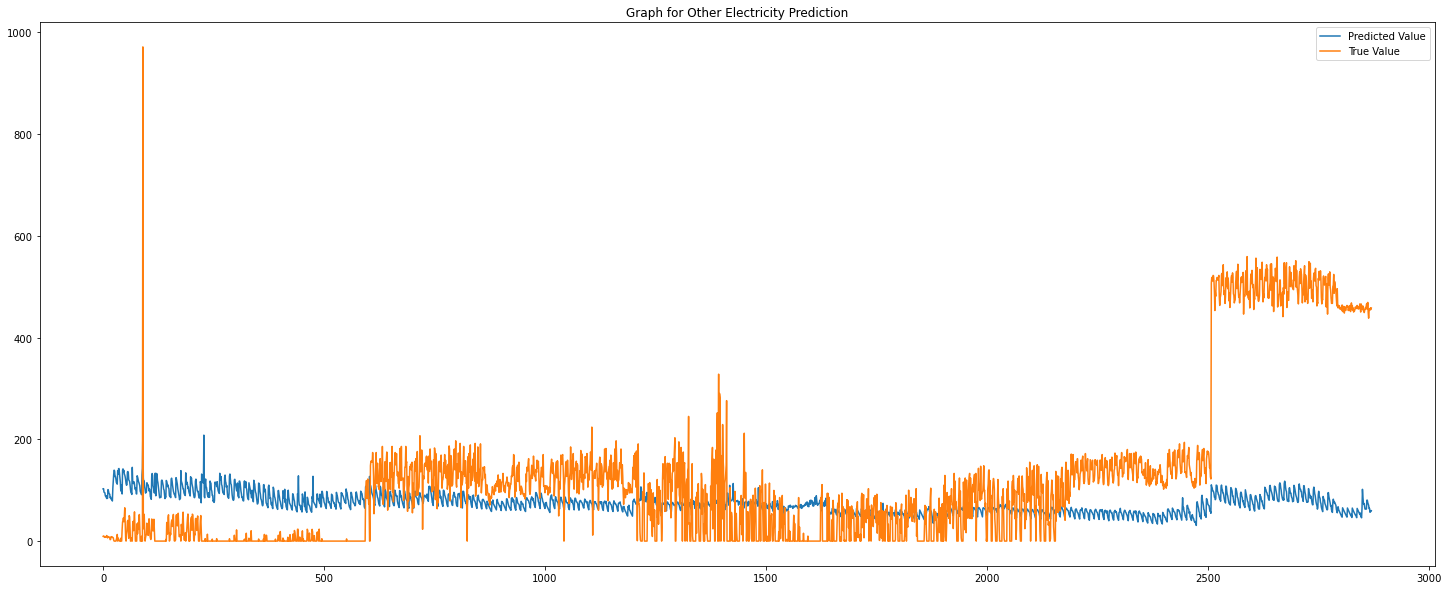

In [108]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [109]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  107.191781067369

Root Mean Sqaured Error is:  161.2488139348486

R2 score is:  -0.11389684668010425


In [110]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

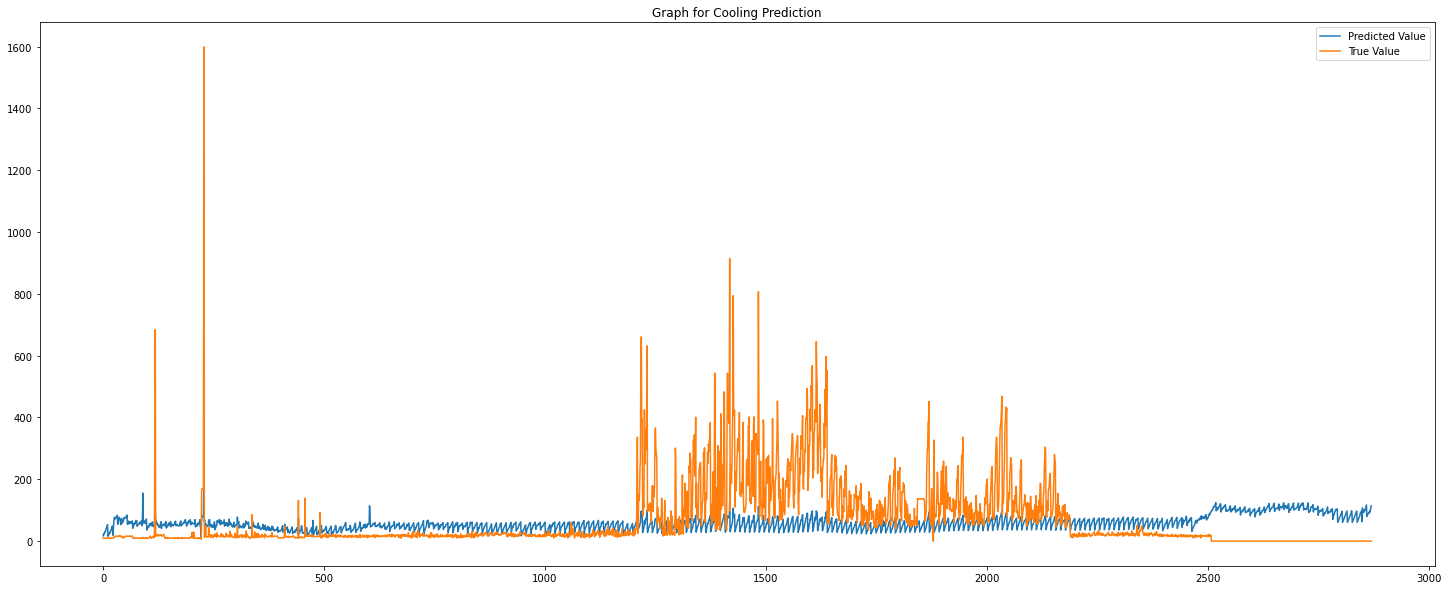

In [111]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [112]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  68.71982419542151

Root Mean Sqaured Error is:  104.35125557709644

R2 score is:  0.004128915646792852


In [113]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

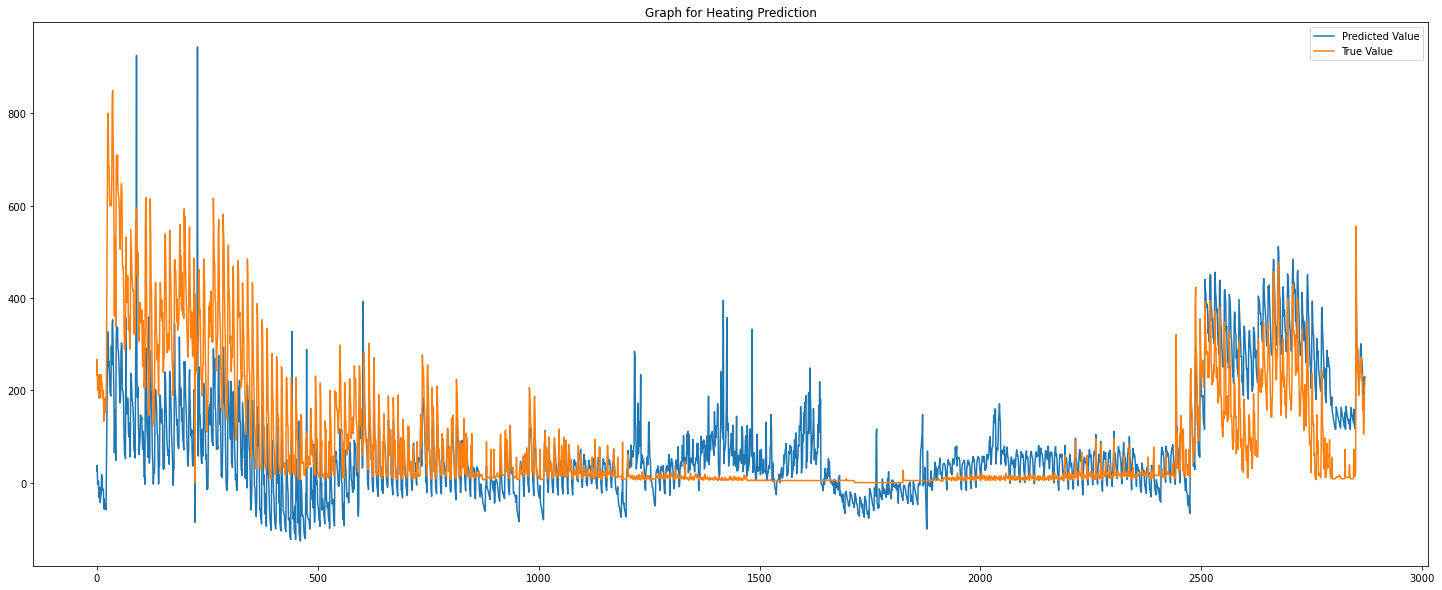

In [114]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [115]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  80.1284430225241

Root Mean Sqaured Error is:  114.50504913816165

R2 score is:  0.3117750849373687


**Night (8pm to 12am)**

In [116]:
X_test1 = df6_test[['Total', 'Year', 'Month', 'Day', 'Hour']].values
y_test1 = df6_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(1305, 5) (1305, 6)


In [117]:
X_test1=sc.fit_transform(X_test1)

In [118]:
pred = model.predict(X_test1)

In [119]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

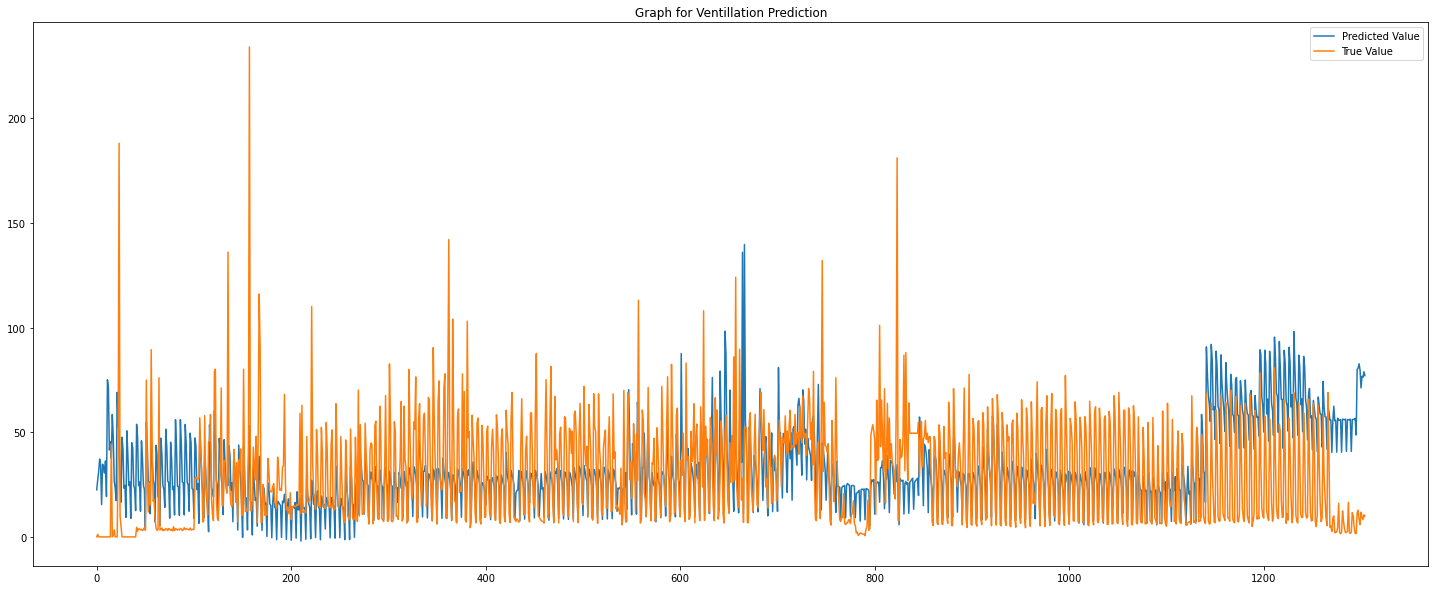

In [120]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [121]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  19.55797726600466

Root Mean Sqaured Error is:  26.80372490574315

R2 score is:  -0.14794970295549792


In [122]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

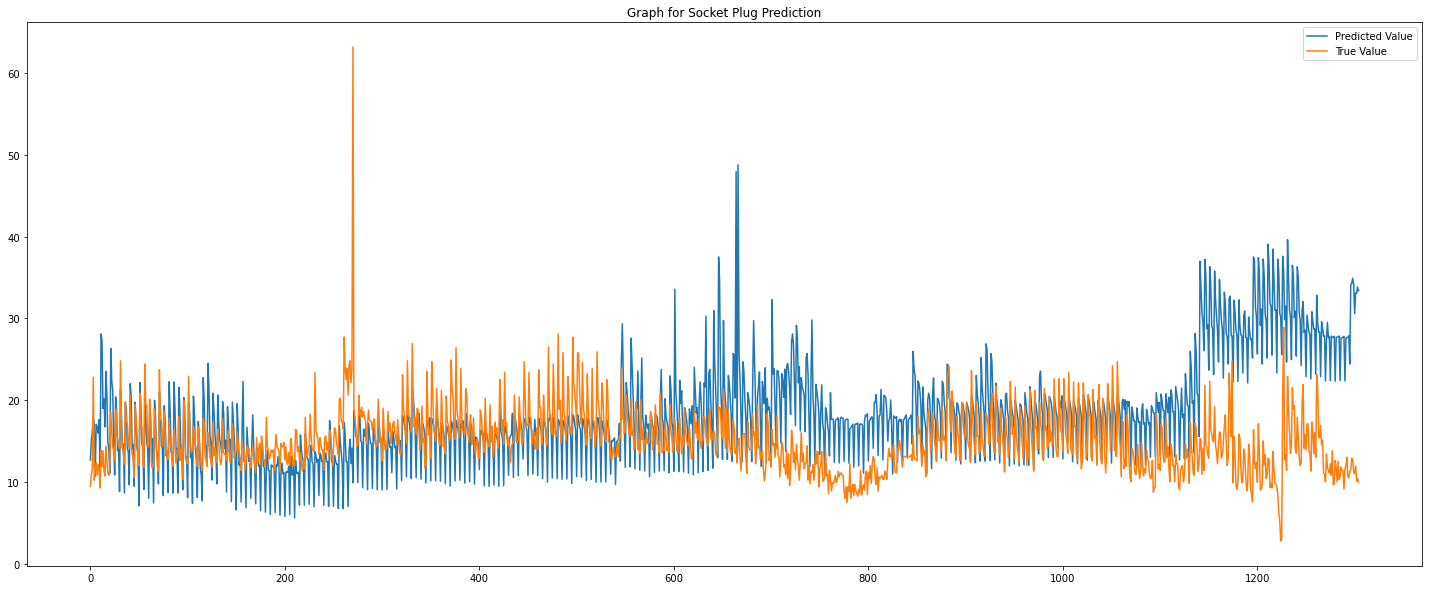

In [123]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [124]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  5.506340658132303

Root Mean Sqaured Error is:  7.822832341927445

R2 score is:  -3.319298594933109


In [125]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

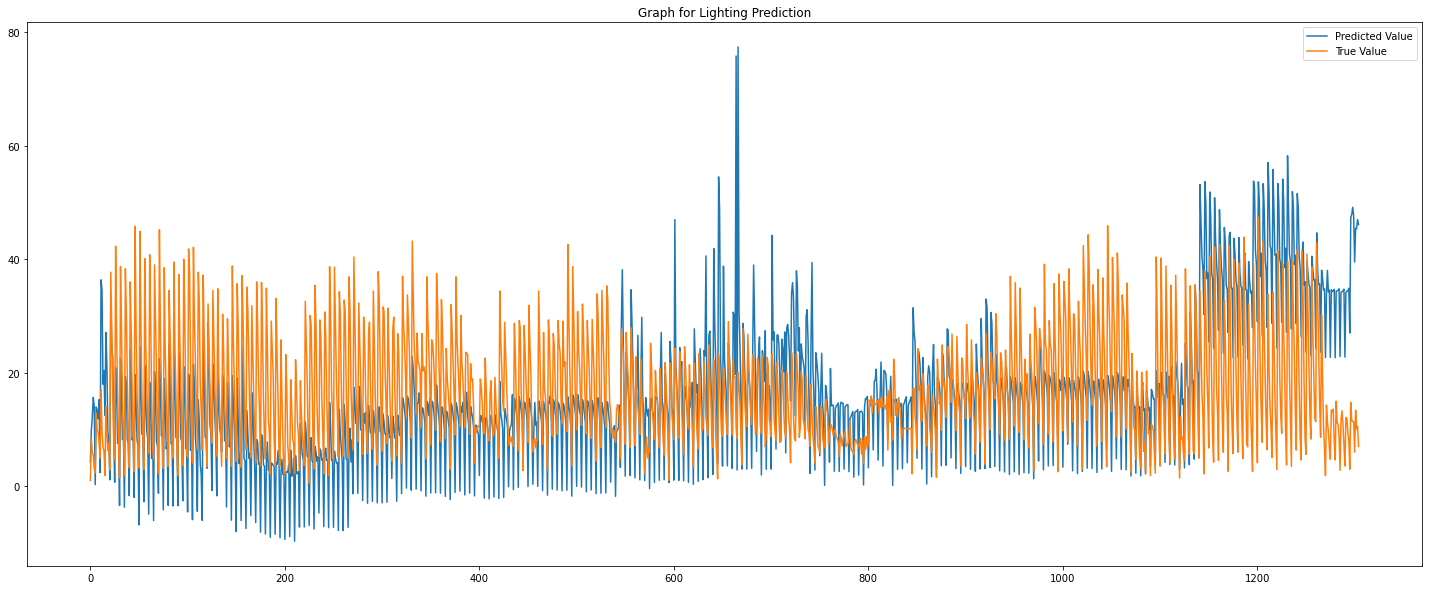

In [126]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [127]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  9.490825877335592

Root Mean Sqaured Error is:  12.260010312253147

R2 score is:  -0.4965653286406133


In [128]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

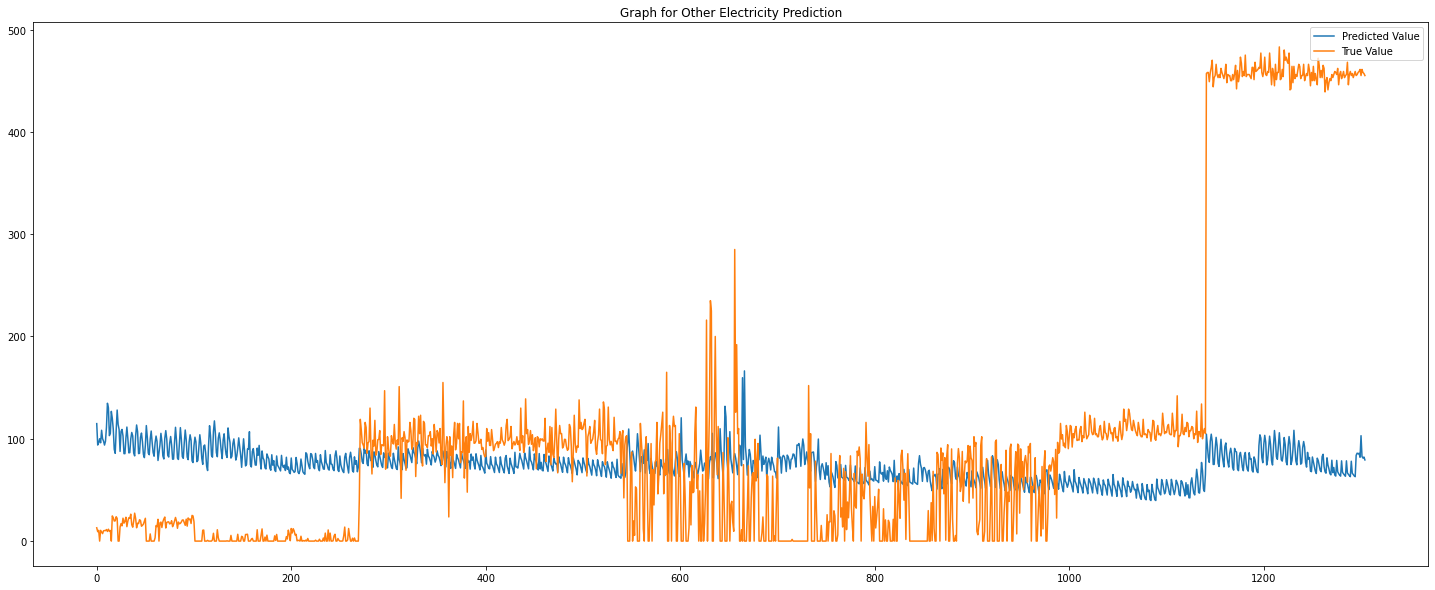

In [129]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [130]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  91.87811676475725

Root Mean Sqaured Error is:  144.4887549132056

R2 score is:  -0.053108420616023055


In [131]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

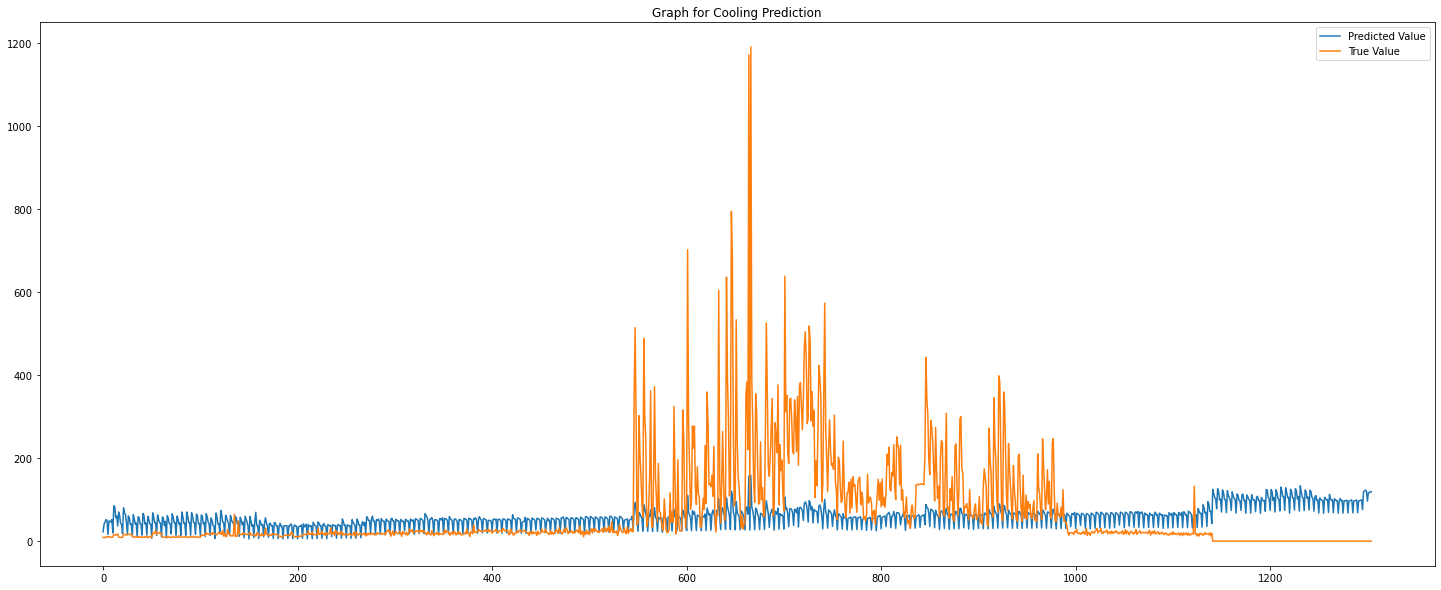

In [132]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [133]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  66.33898839960167

Root Mean Sqaured Error is:  107.1281200802482

R2 score is:  0.05960001770408441


In [134]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

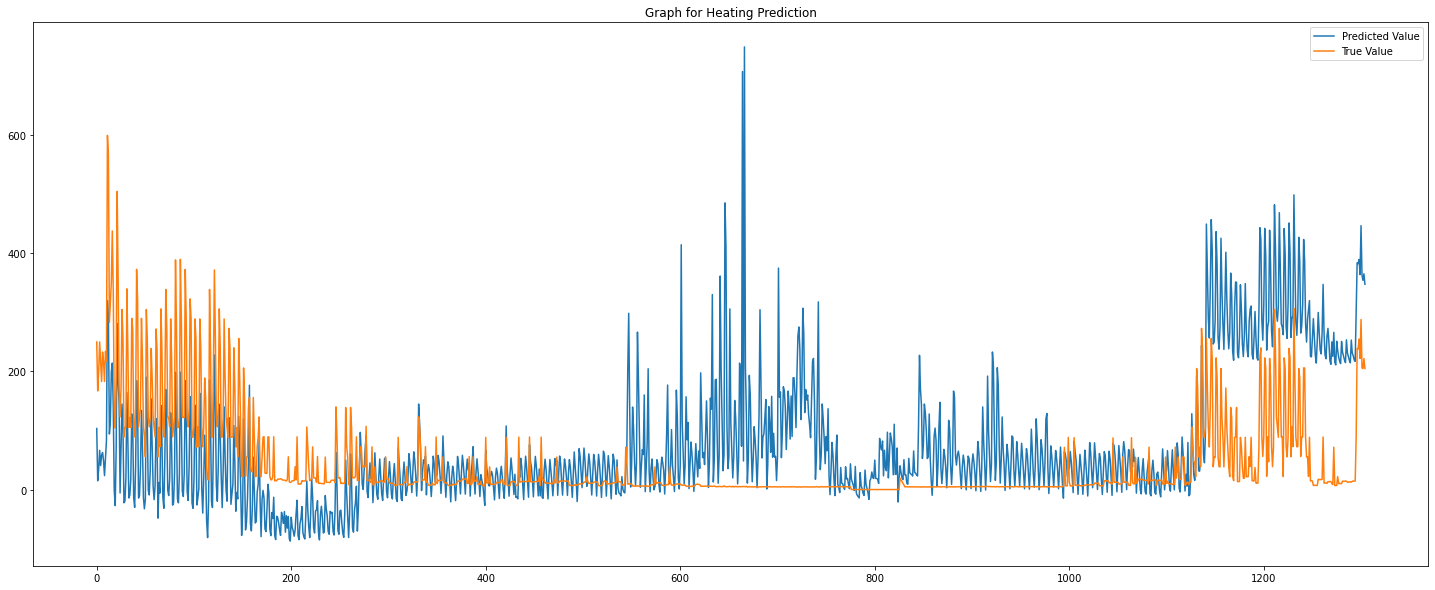

In [135]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [136]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  81.55913534135327

Root Mean Sqaured Error is:  114.07456018361108

R2 score is:  -1.193024645969809


**Weekends (Saturday and Sunday)**

In [137]:
X_test1 = df7_test[['Total', 'Year', 'Month', 'Day', 'Hour']].values
y_test1 = df7_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2496, 5) (2496, 6)


In [138]:
X_test1=sc.fit_transform(X_test1)

In [139]:
pred = model.predict(X_test1)

In [140]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

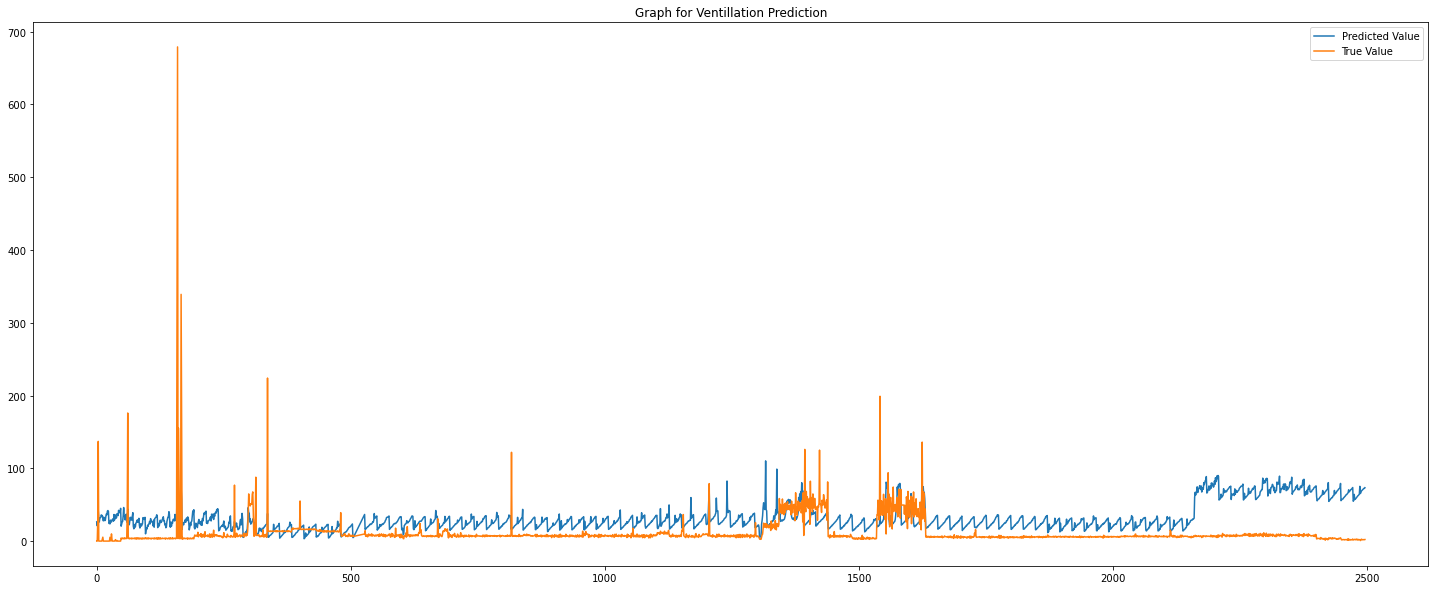

In [141]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [142]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  24.683460274910267

Root Mean Sqaured Error is:  33.62277703418717

R2 score is:  -1.2360993884263034


In [143]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

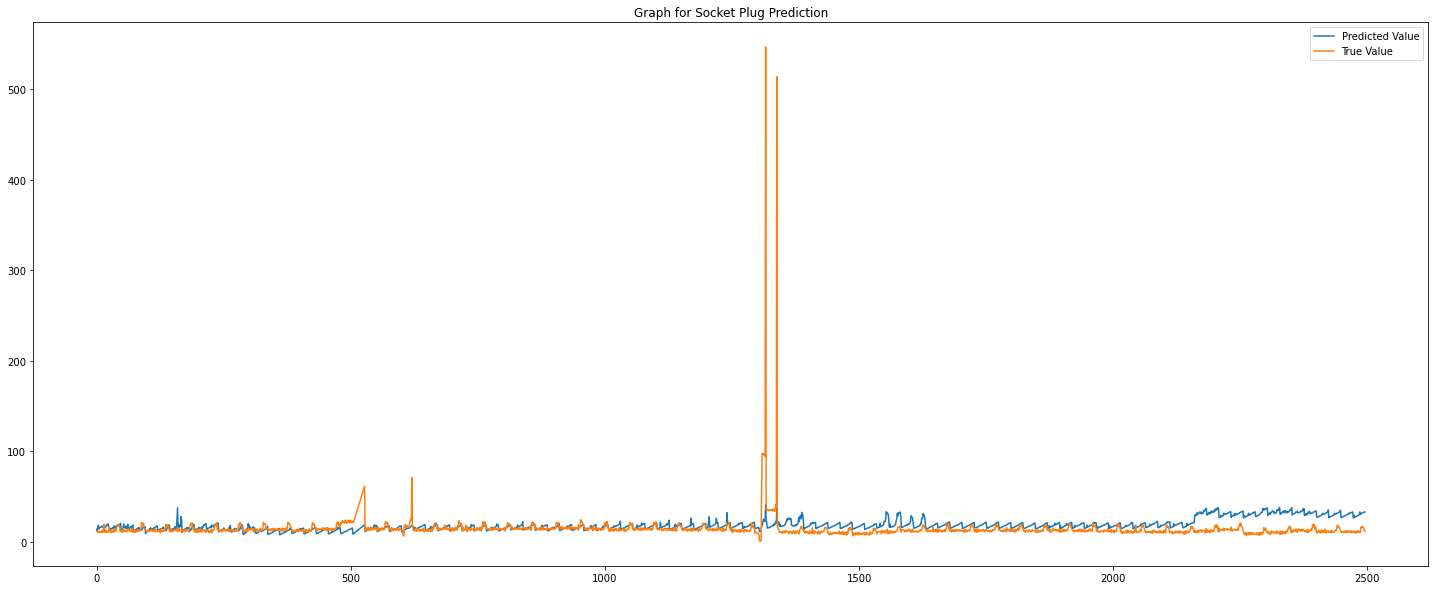

In [144]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [145]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  7.2570215203841535

Root Mean Sqaured Error is:  17.243059714092354

R2 score is:  -0.1623458838606624


In [146]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

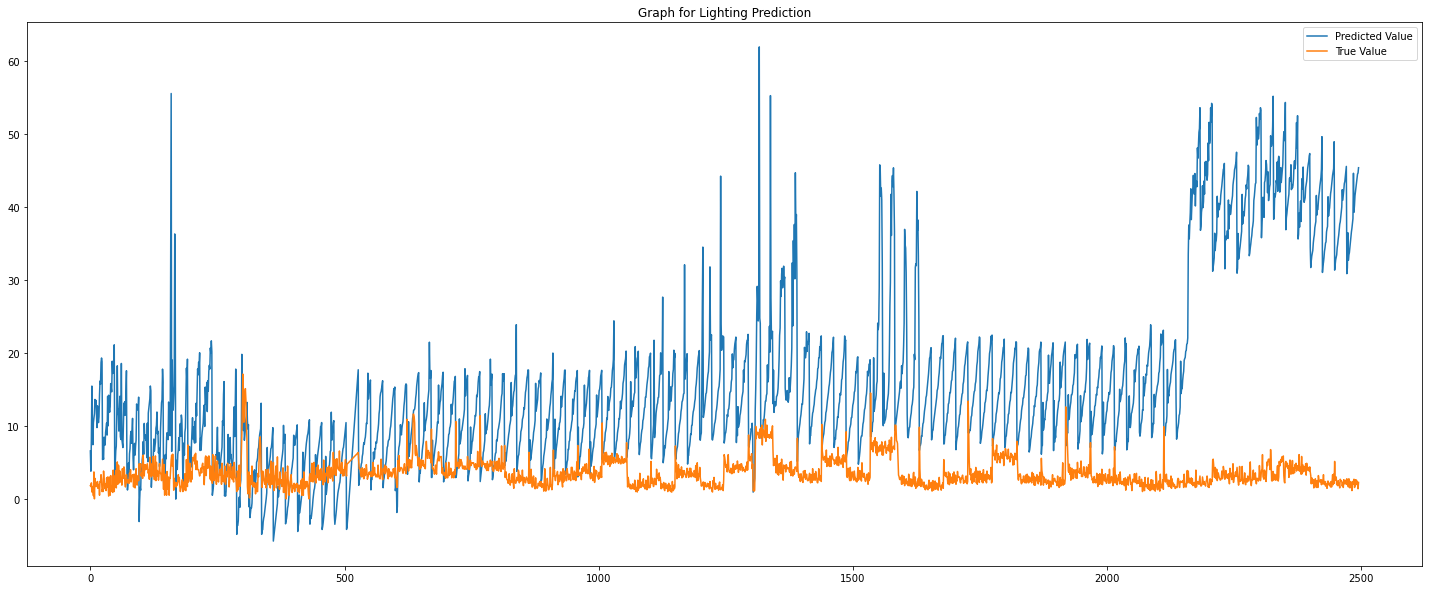

In [147]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [148]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  12.954028064313453

Root Mean Sqaured Error is:  17.54962469122507

R2 score is:  -89.37063287993257


In [149]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

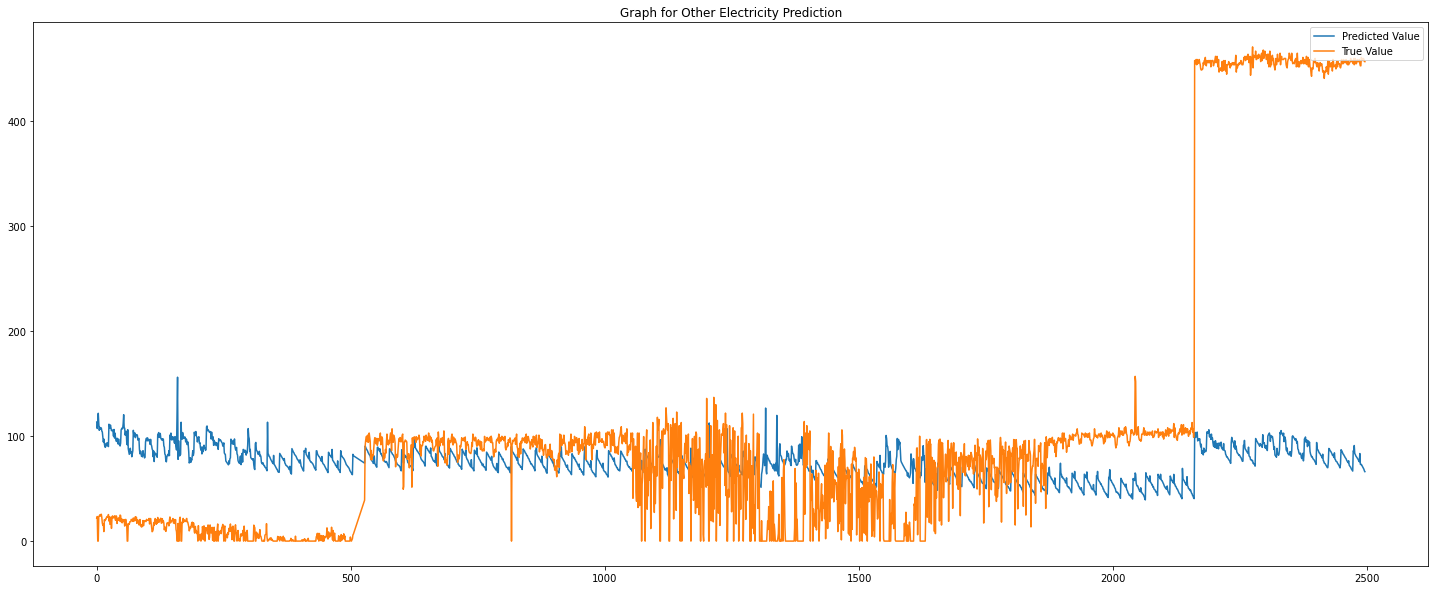

In [150]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [151]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  86.1244367671562

Root Mean Sqaured Error is:  143.7021020113655

R2 score is:  -0.04253261719258217


In [152]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

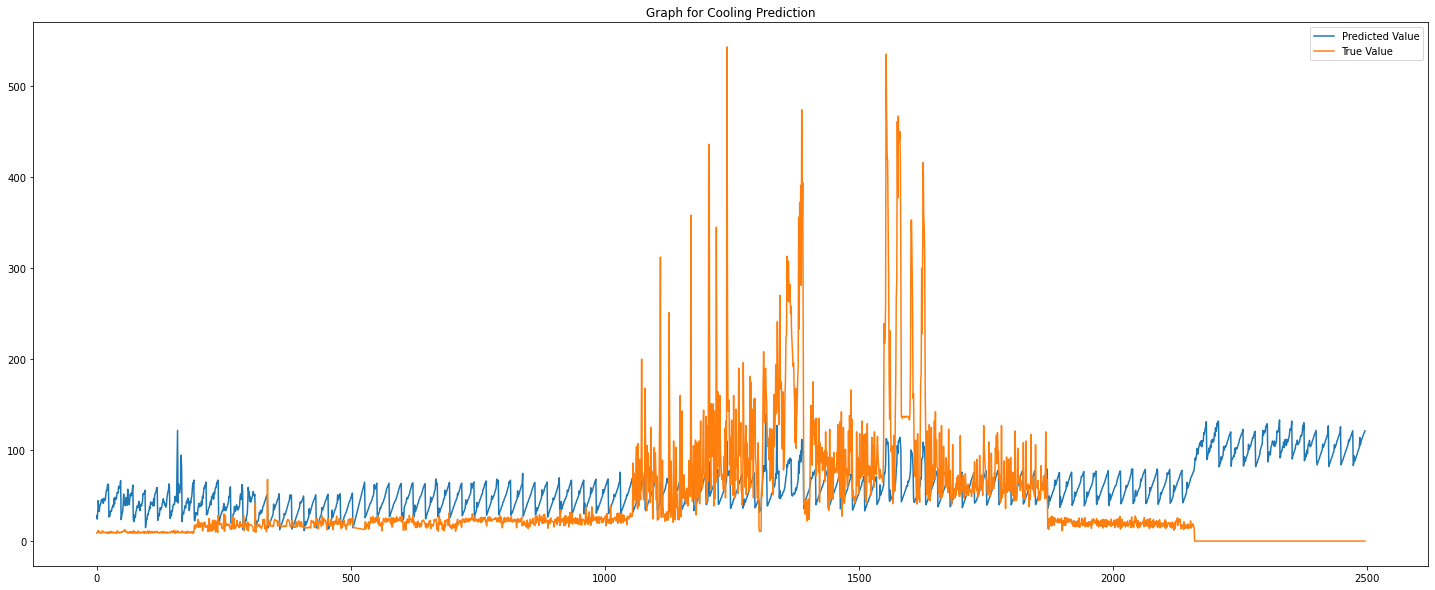

In [153]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [154]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  45.117761654172604

Root Mean Sqaured Error is:  65.33274334745332

R2 score is:  -0.12796617459677617


In [155]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

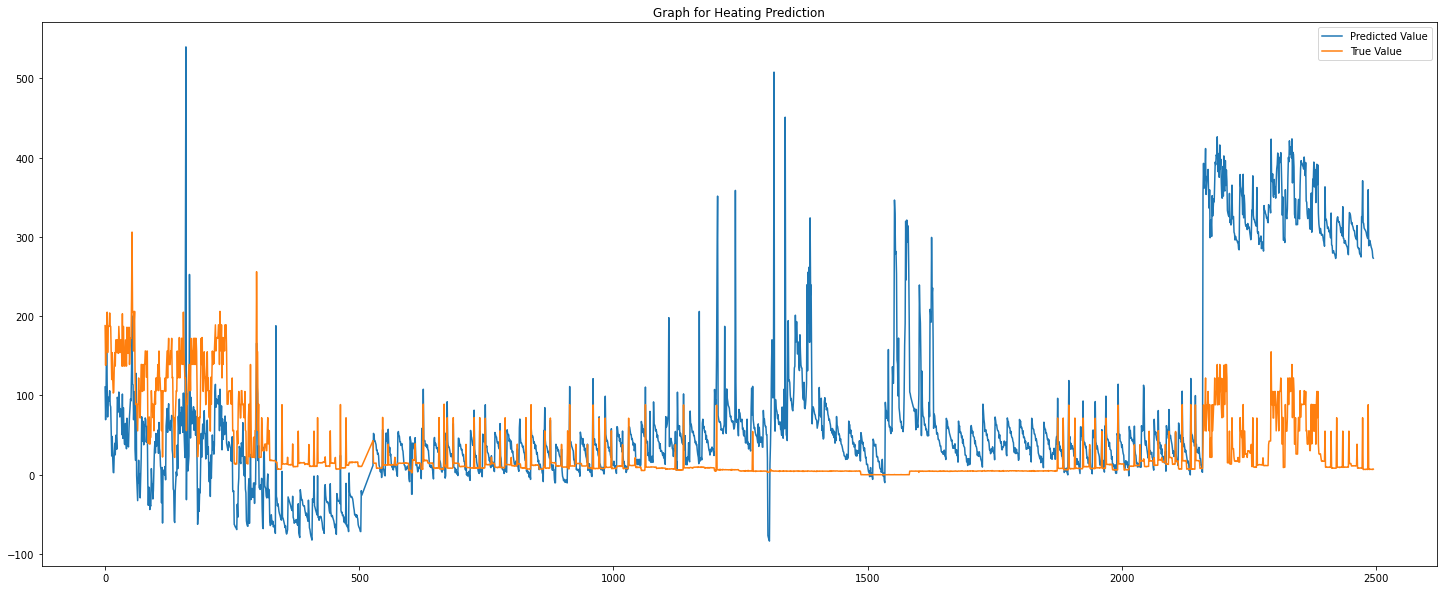

In [156]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [157]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  80.17584561348042

Root Mean Sqaured Error is:  122.7197884067403

R2 score is:  -6.849600414463421
